### ARIMA none-seasonal/seasonal
### (AR: Auto Regressive), (I: Integrated), (MA: Moving Average )

ARIMA models provide another approach to time series forecasting. Exponential smoothing and ARIMA models are the two most widely used approaches to time series forecasting, and provide complementary approaches to the problem. While exponential smoothing models are based on a description of the trend and seasonality in the data, ARIMA models aim to describe the autocorrelations in the data.

- **AR**: handles regression of perdio **(p)** e.g. 2 month/5 days before for doing the auto-regression
- **I**: handle differencing and make the distribution stationary (no trend and seasonality), meaning mean and variance stays the same (contained mean and variance) by performing differencing firts on actual data between each two consecutive time, then if is the result is not stationary (mean varies in time or variance changes), apply the process again on this differences (between each two consequitive difference), and so on until the distribution is stationary. The number of time performing this differencing is assinged to **(d)**, the differencing kinda similar to Gradient boosting calculation
- **MA**: moving average term, are linear regression on error (what is not explained by trend or seasonality), the **(q)** shows period of time in error to be used for regression

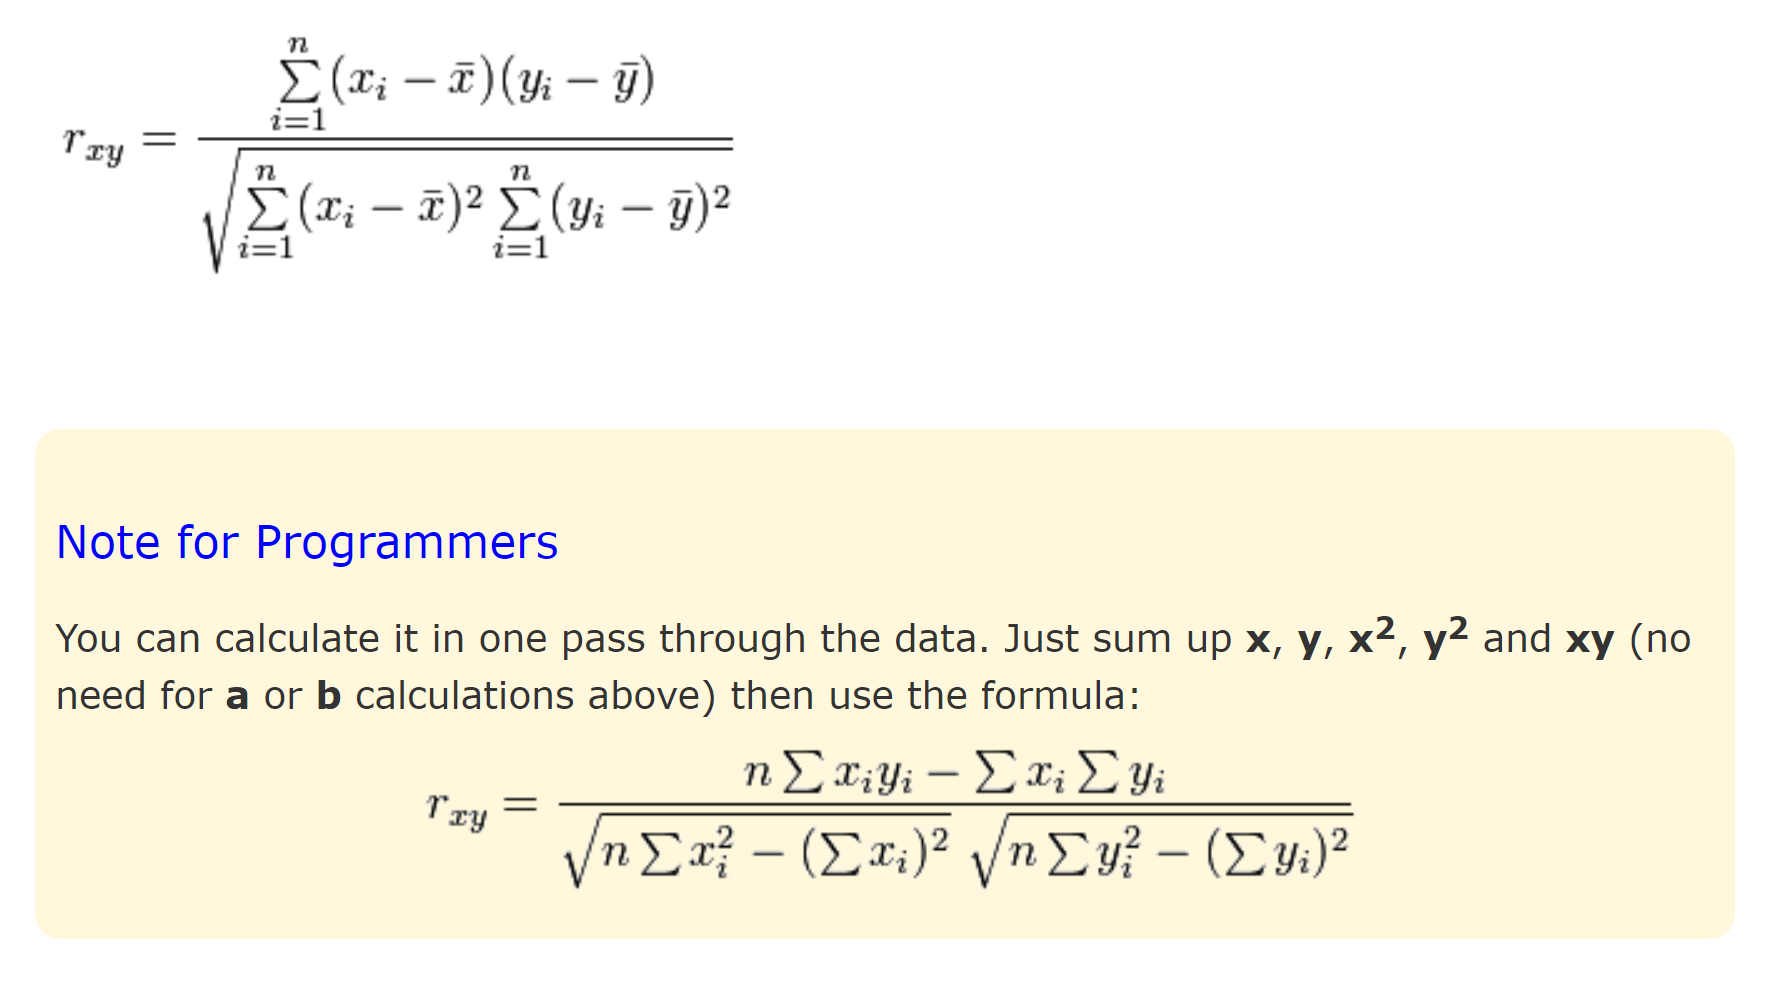

In [2]:
from IPython.display import Image
Image("img/correlation.png")

#### Correlation does not mean causation, r_xy>0 positive correlation, r_xy<0 negative correlation, r_xy ~ 0 no correlation

### Stationary (no trend, no seasonality, no predictability in long-term future)
- white noise series is stationary
-  time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length
-  a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance

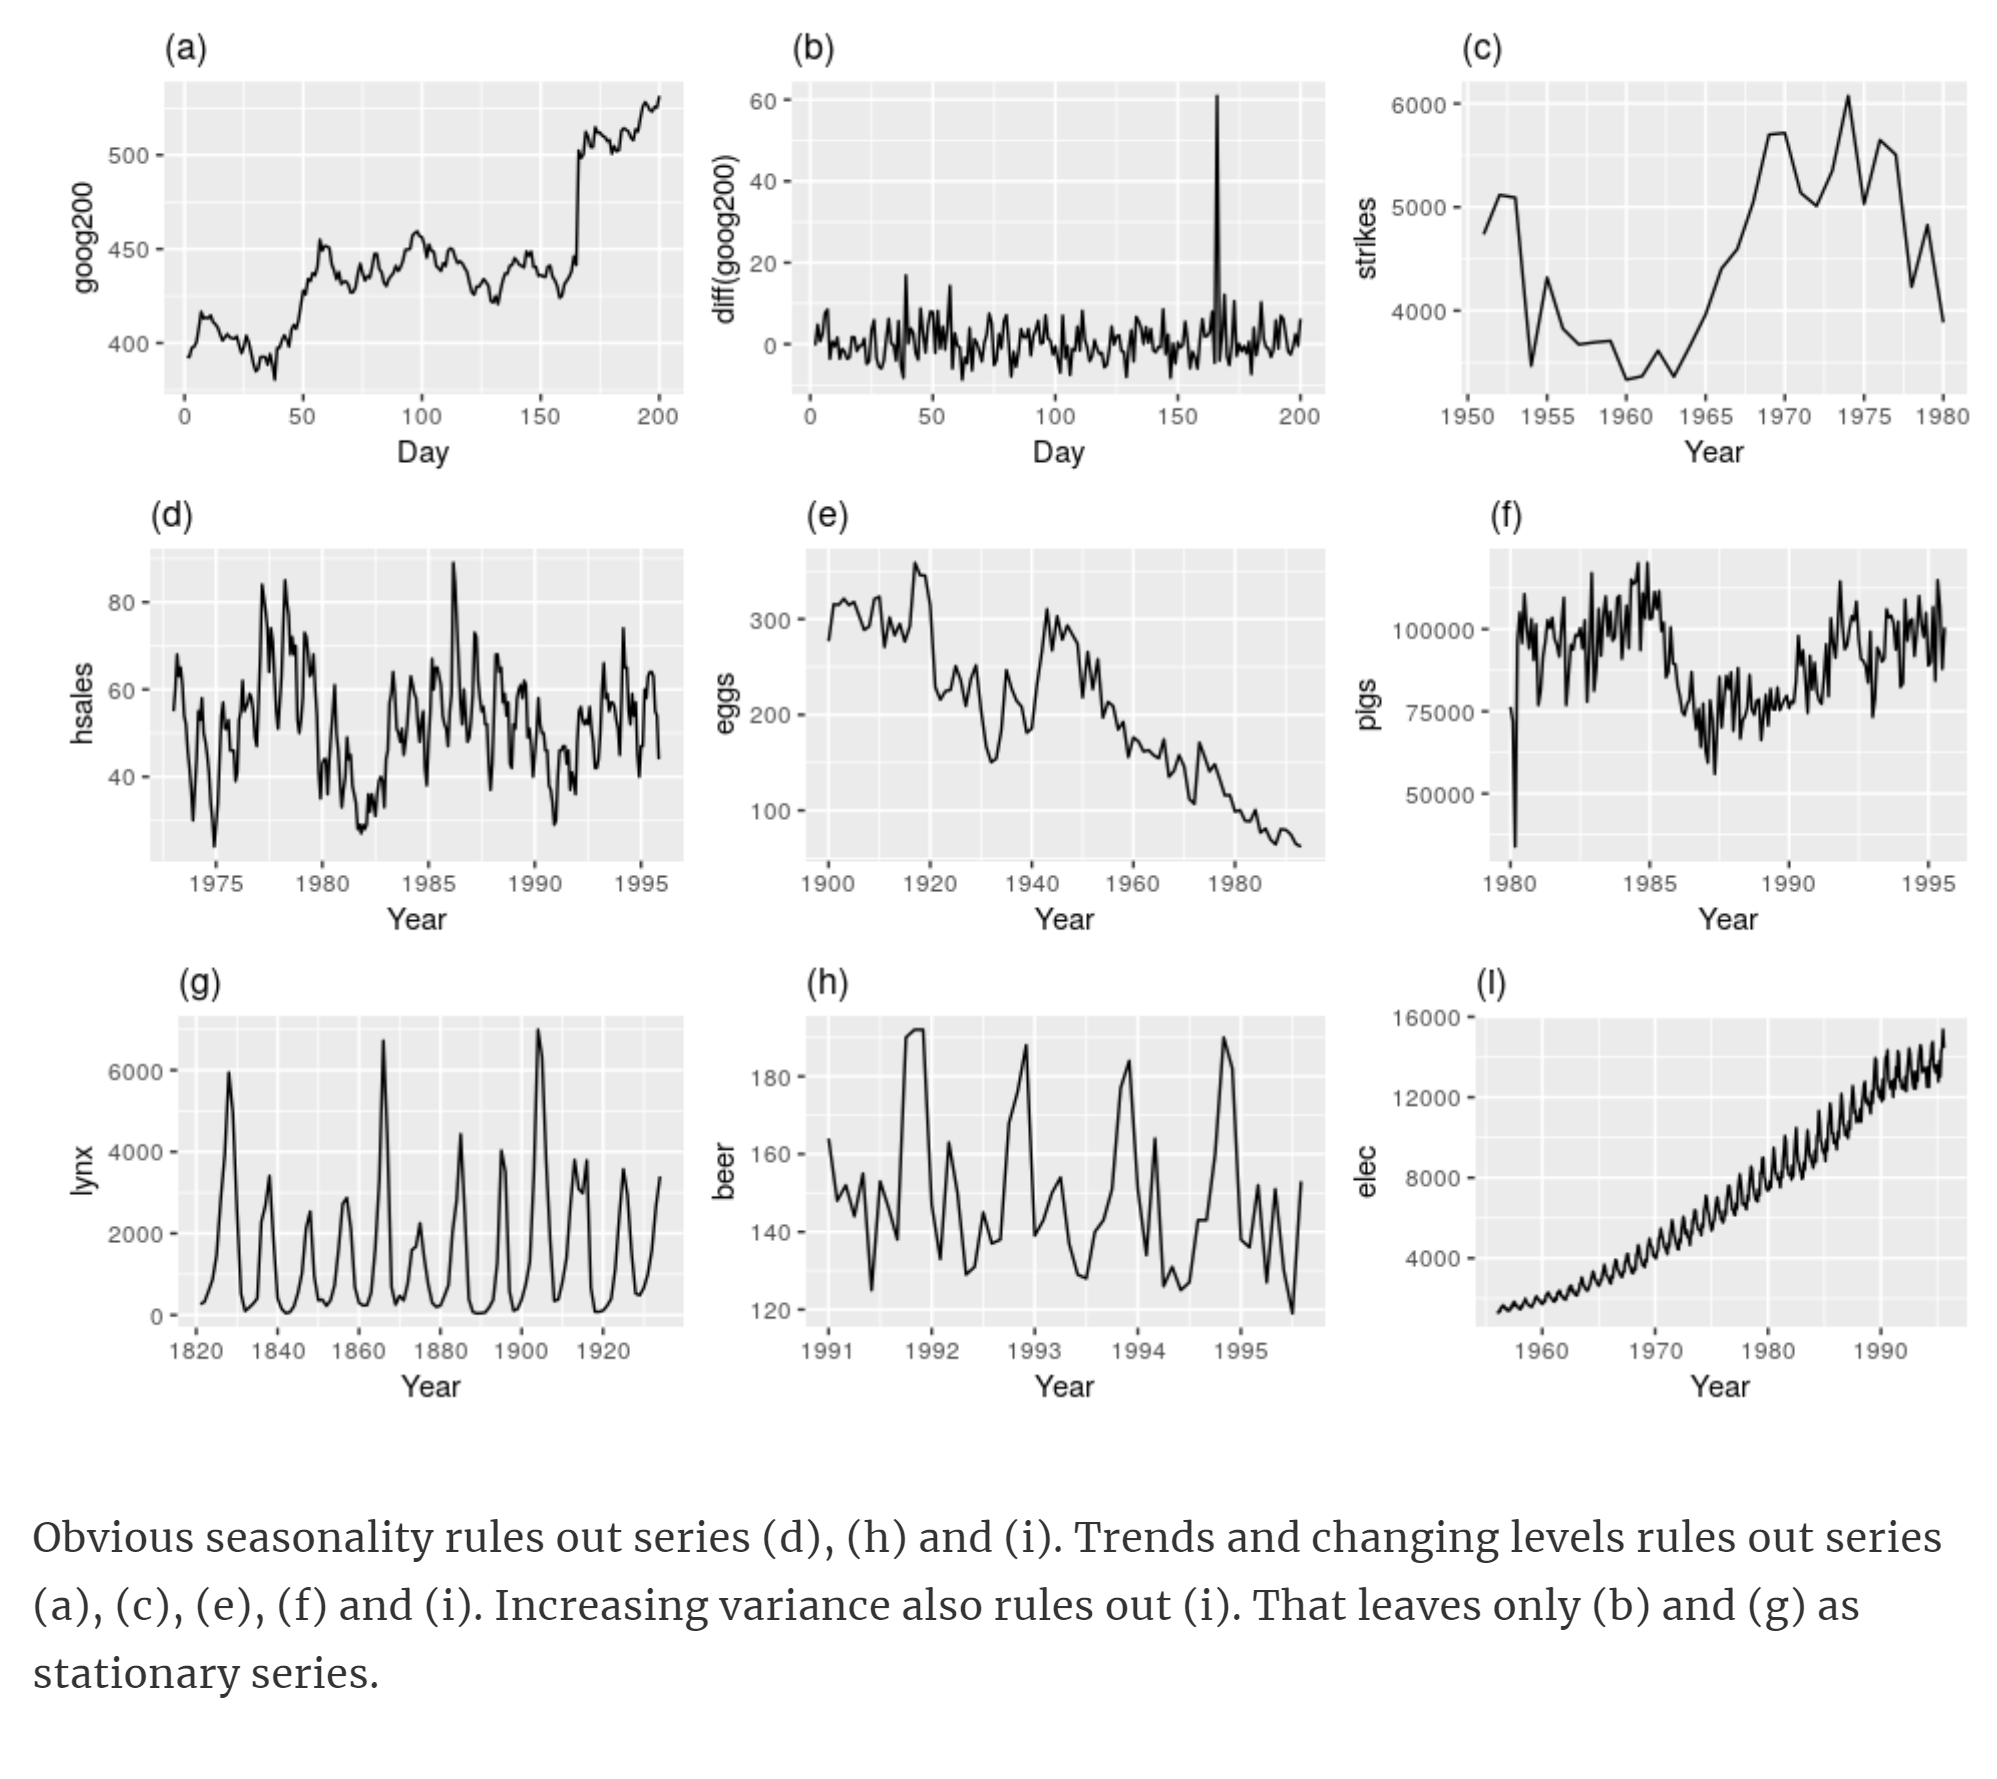

In [3]:
Image("img/stationary.png")

d seems cyclic, g more seasonal

### Autocorrelation function (ACF) and partial autocorrelation (PACF) 

### ACF (Autocorrelation function)

- Good to check for seeing if series is stationary (in addition to concept of differencing)
- Correlation of each time series with it self. Performed under various lag. for example lag(1) means auto correlation of time series original distribution vs. distribution shifted by 1 time interval. lag(2) means auto correlaiton with shifted distribution by 2 time interval and so on.
- Below google stock itself shows slow drop of ACF, suggesting stock itself is not stationary. but the stock first difference is flat. suggesting stock difference is stationary
- slower ACF decay shows the data still has relation with internal e.g. n in its pass, so not stationary
- ACF plot can help us to decide whether to use AR or MA model. Using both AR and MA not very common. On stationarized series if **lag(1) of ACF is positive we will use AR(1), if lag(1) is negative we use MA**
- Some time we need to look at multiple differencing and their ACF to decide which one is stationary and what lag or AR/MA is best

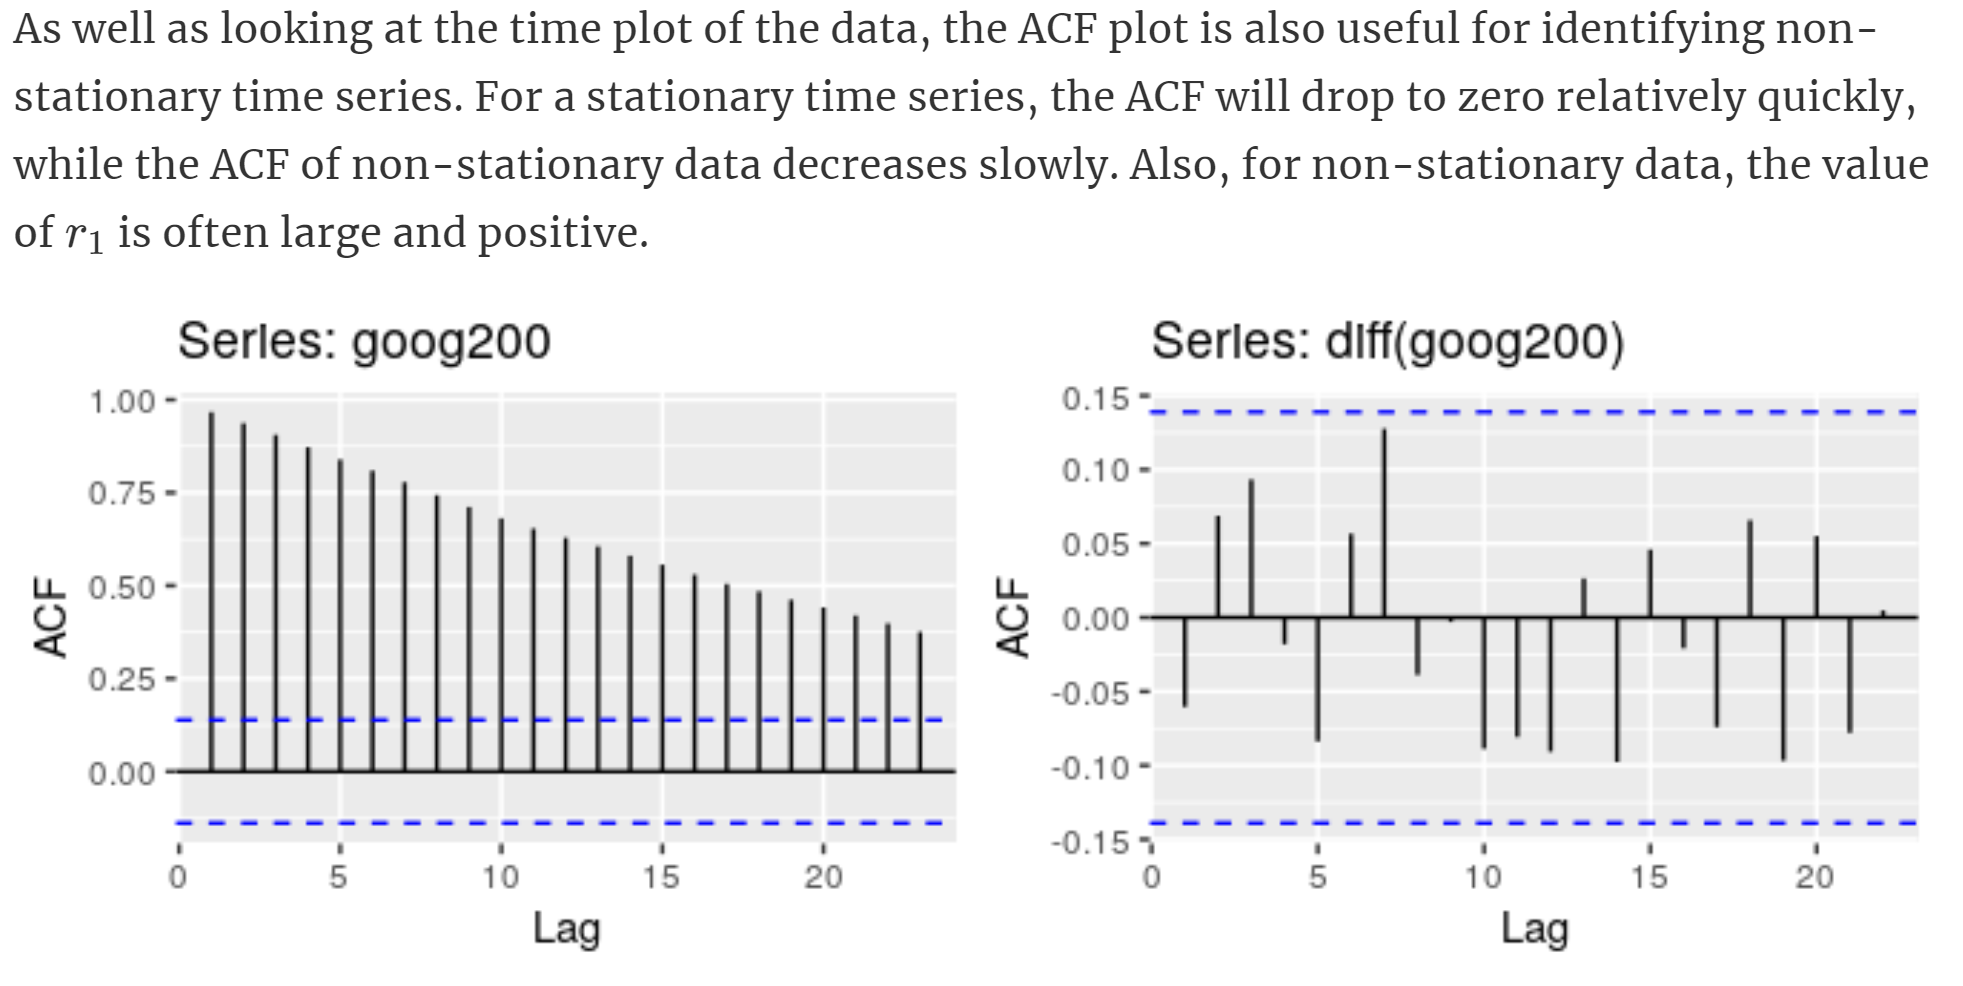

In [6]:
Image("img/acf.png")

Above case shows negative first lag, possible MA

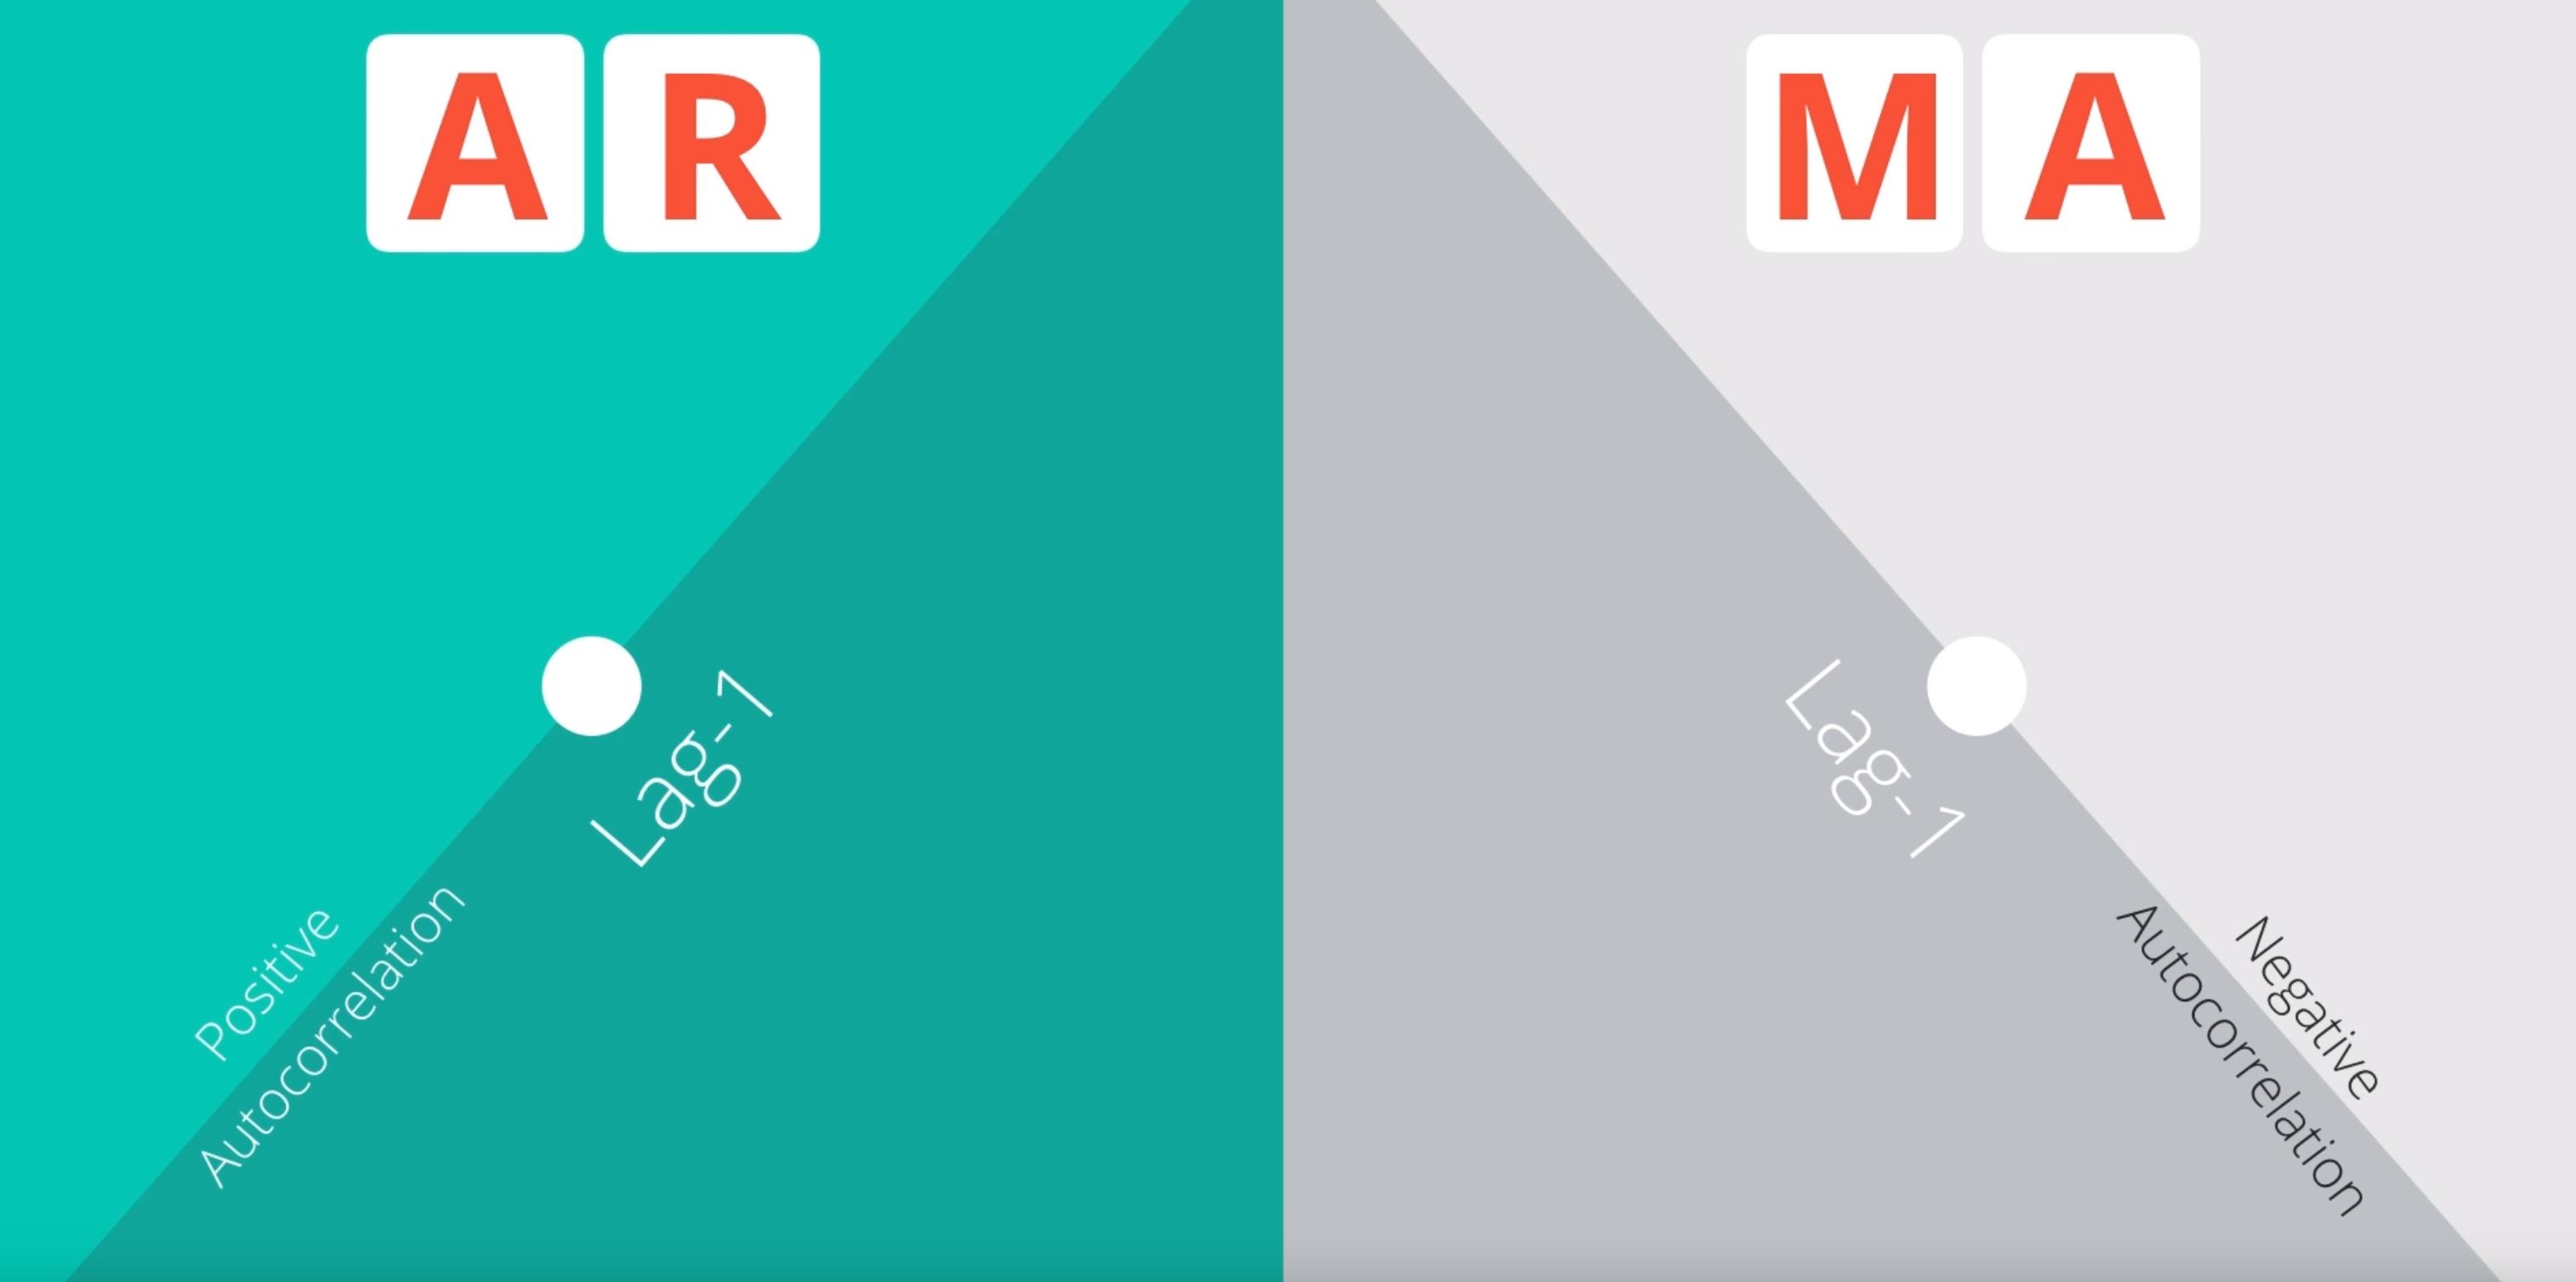

In [8]:
Image("img/ar_ma_acf.png")

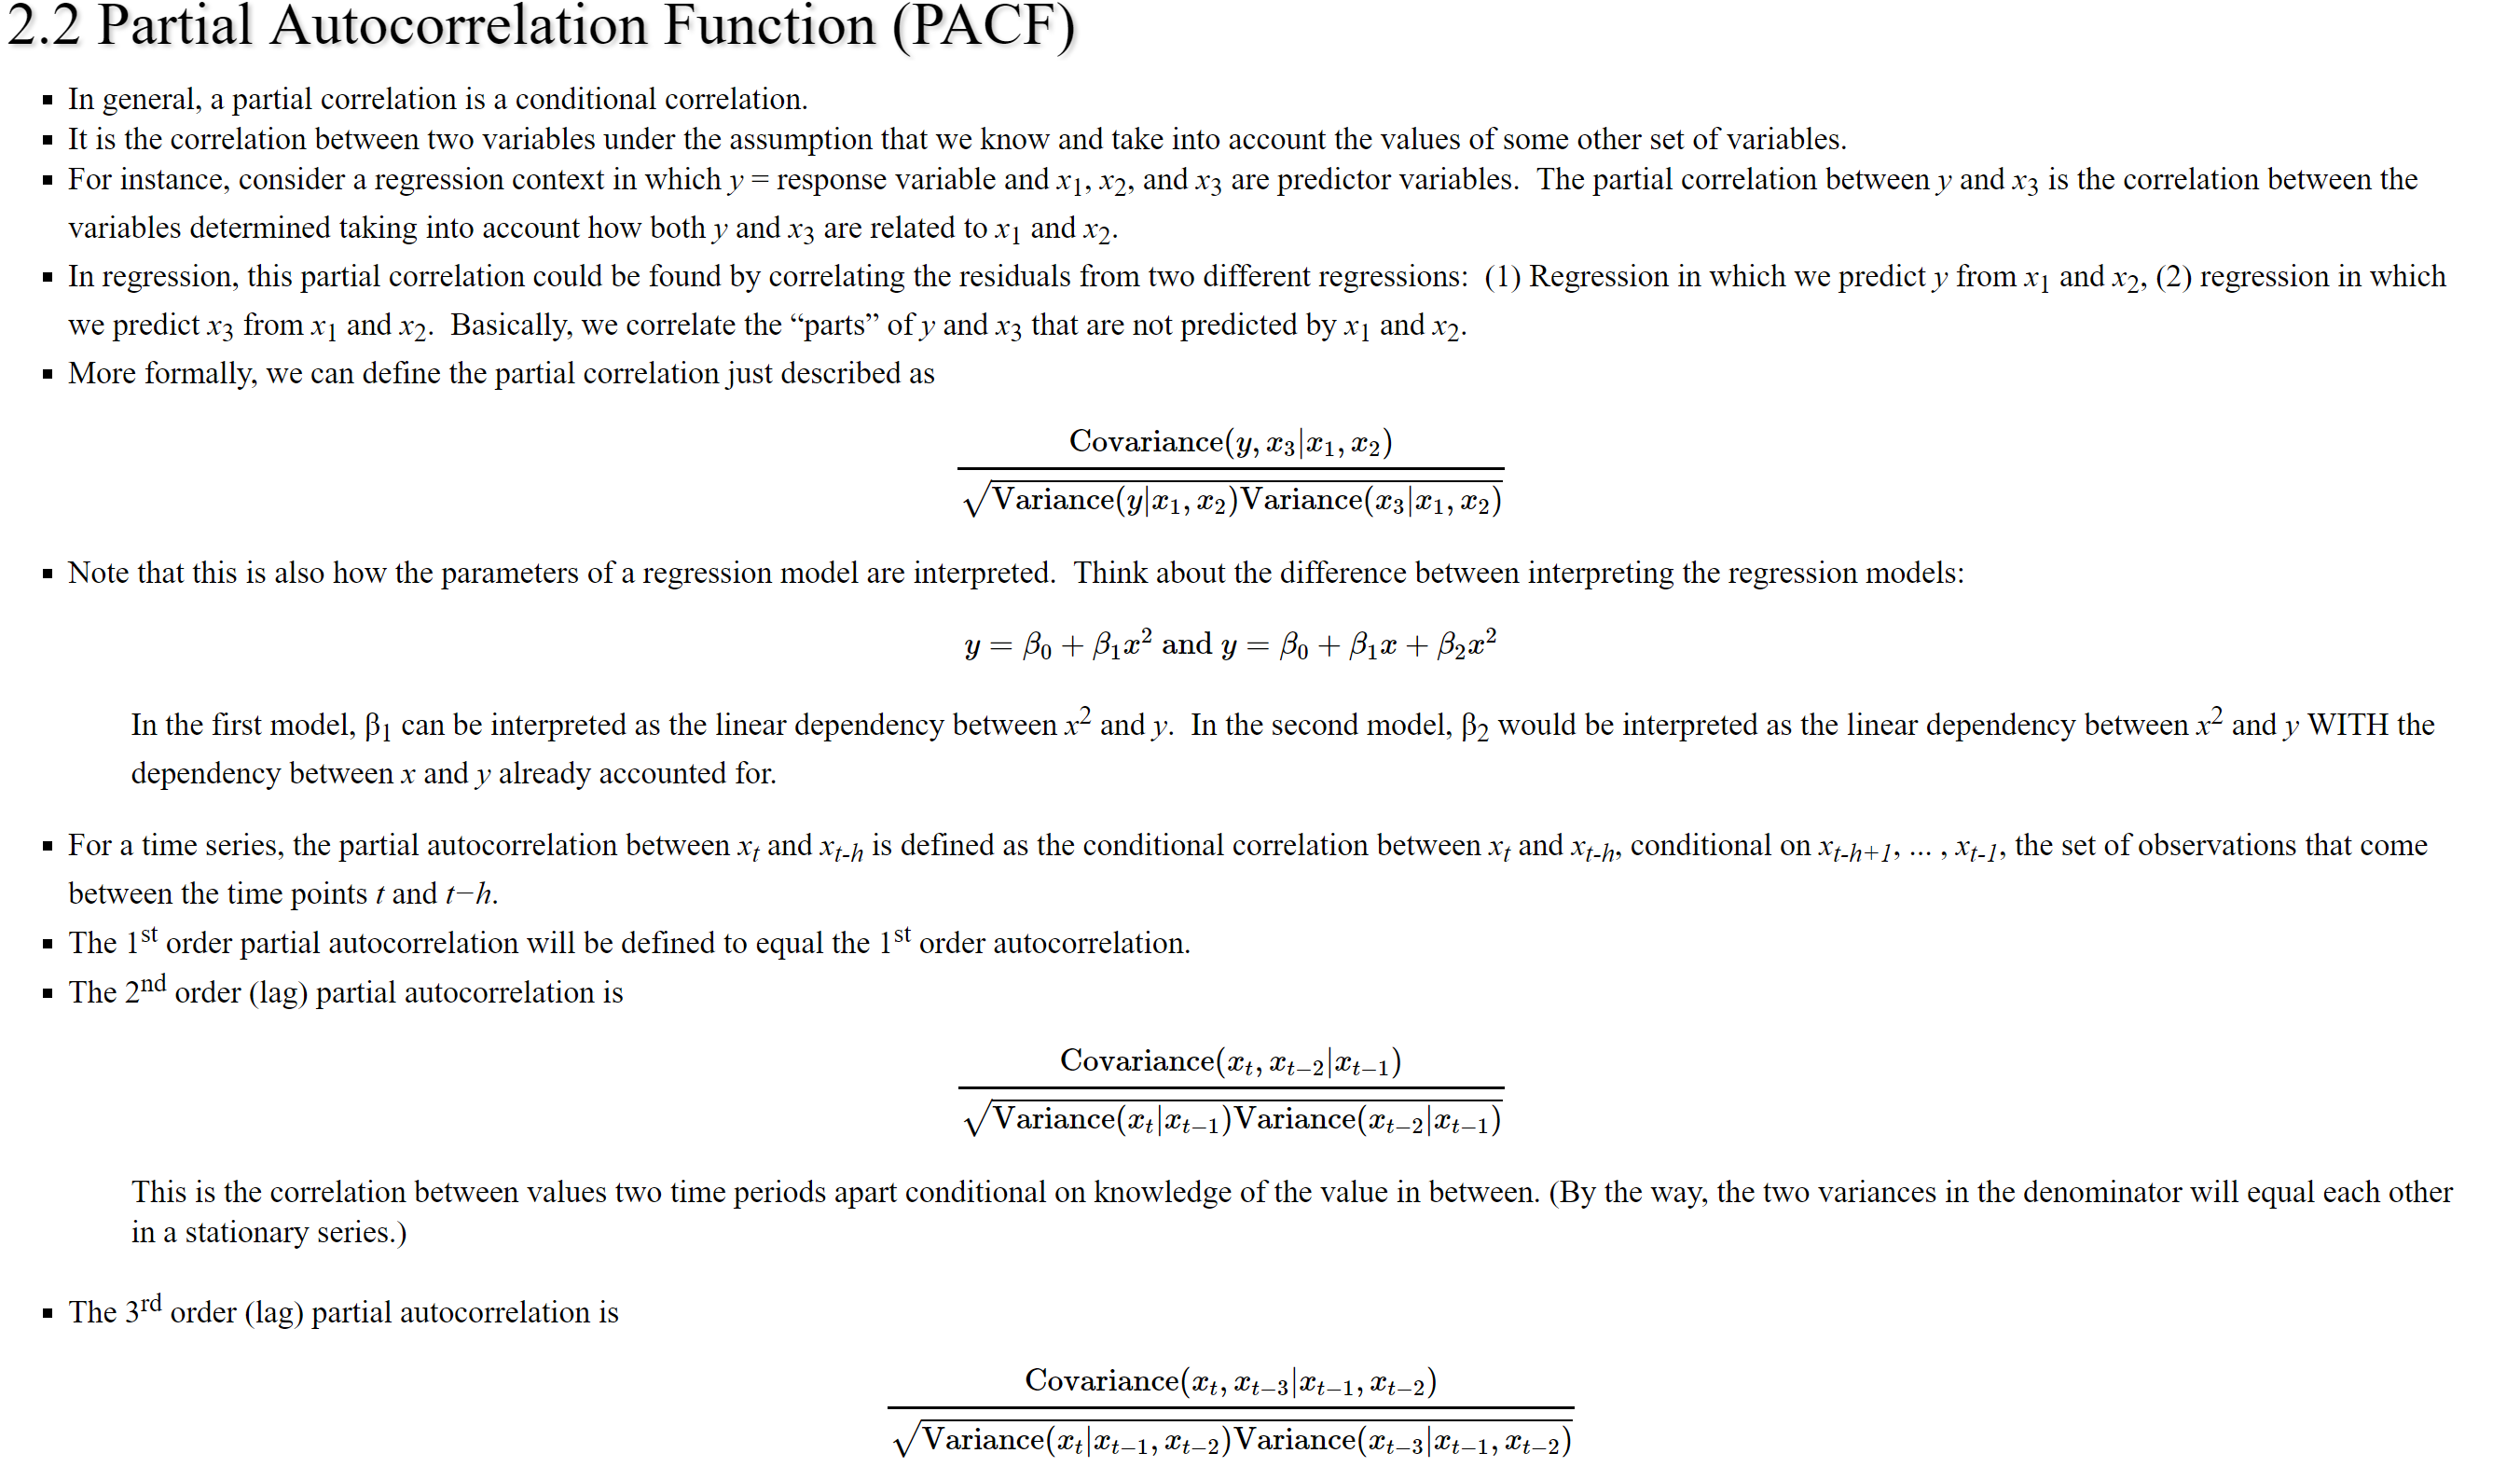

In [20]:
# https://newonlinecourses.science.psu.edu/stat510/node/62/
Image("img/penn_state_pacf.png")

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. 

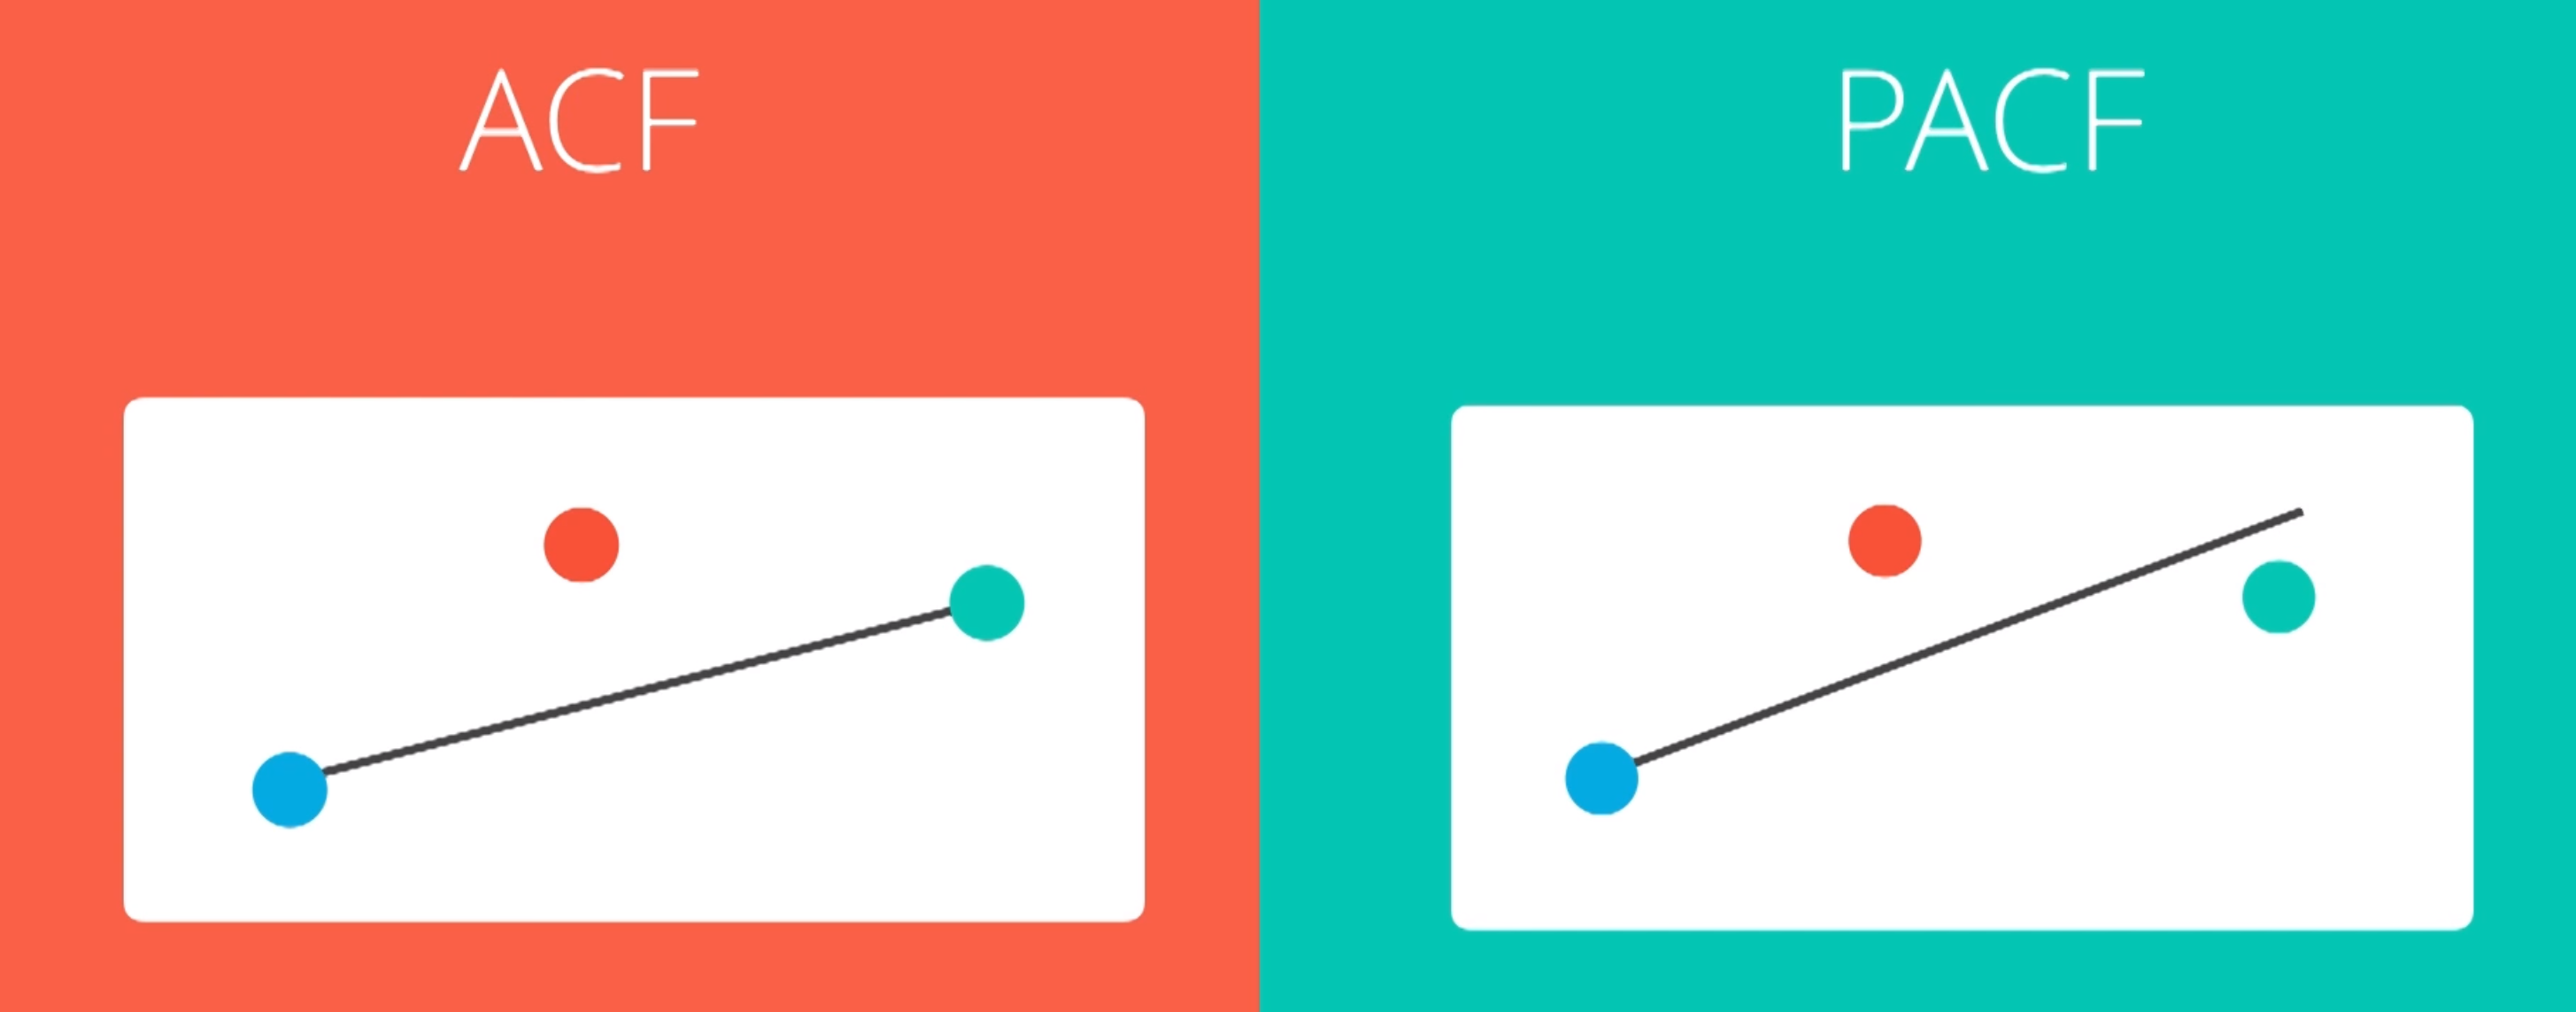

In [11]:
Image("img/acf_pacf.png")

### Sharp drop in PACF after lag(1), therefore, AR(1)

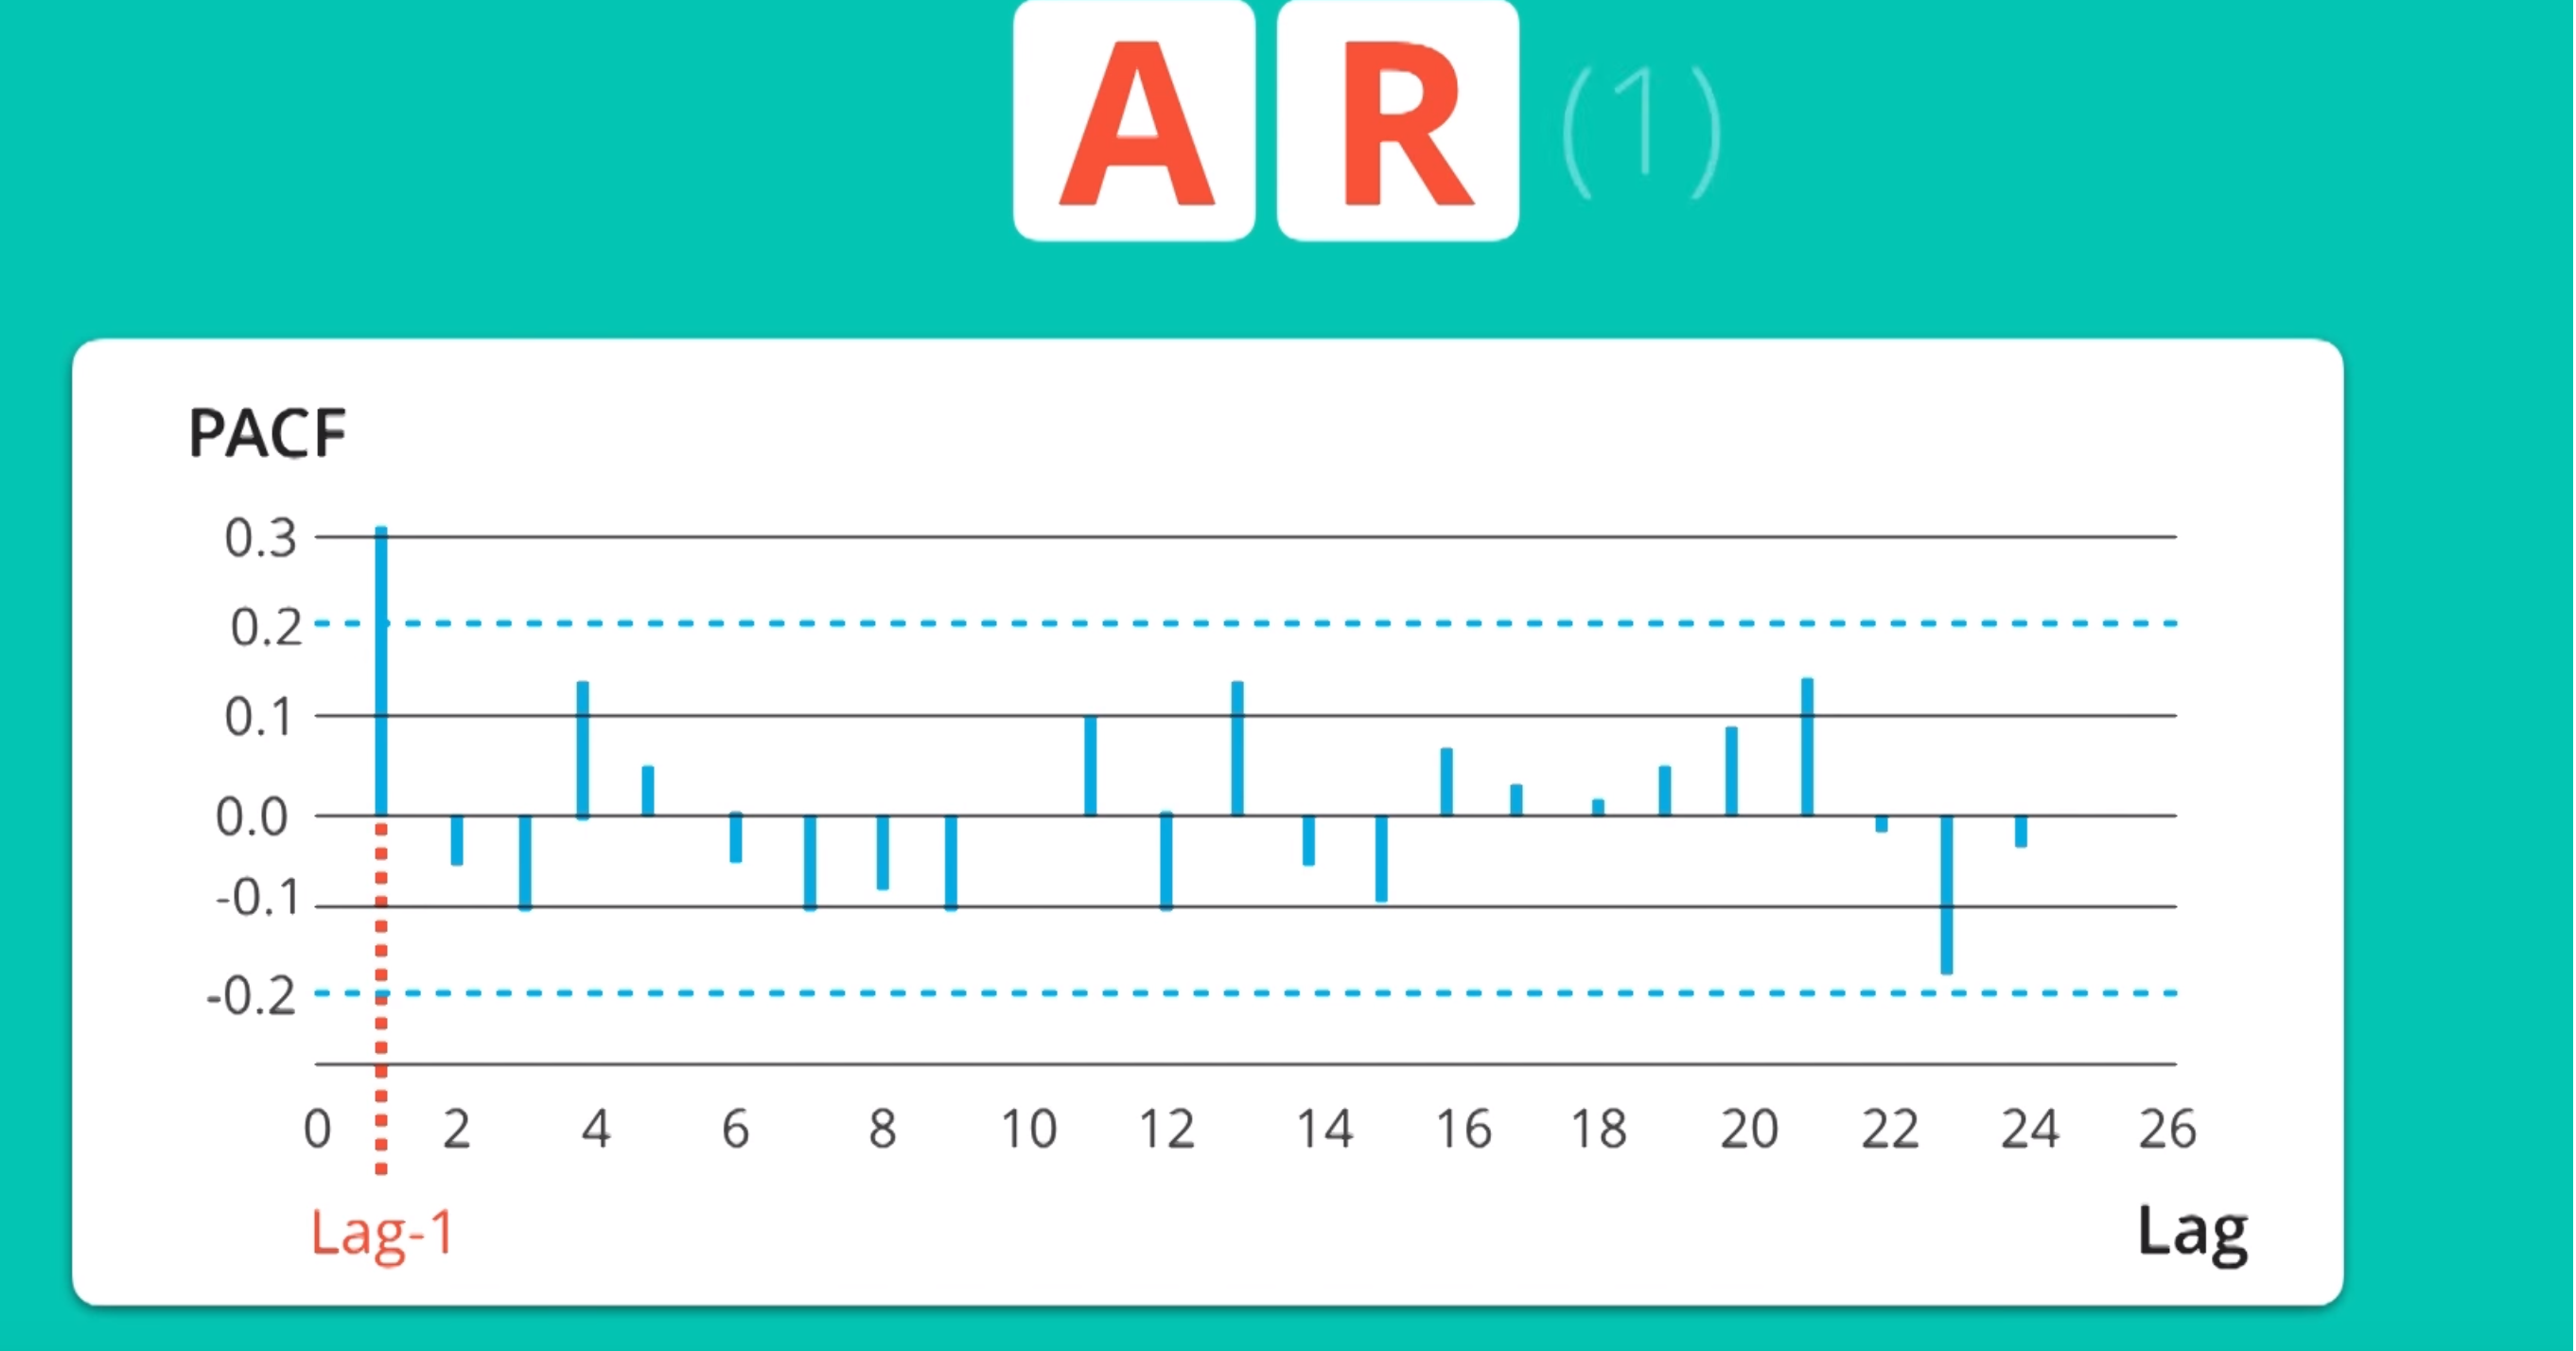

In [13]:
Image("img/ar1.png")

### Identification of an AR model is often best done with the PACF. (Only beyond confidence interval changes are statistically significant)

For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

### AR(1)? Below is not as suddent

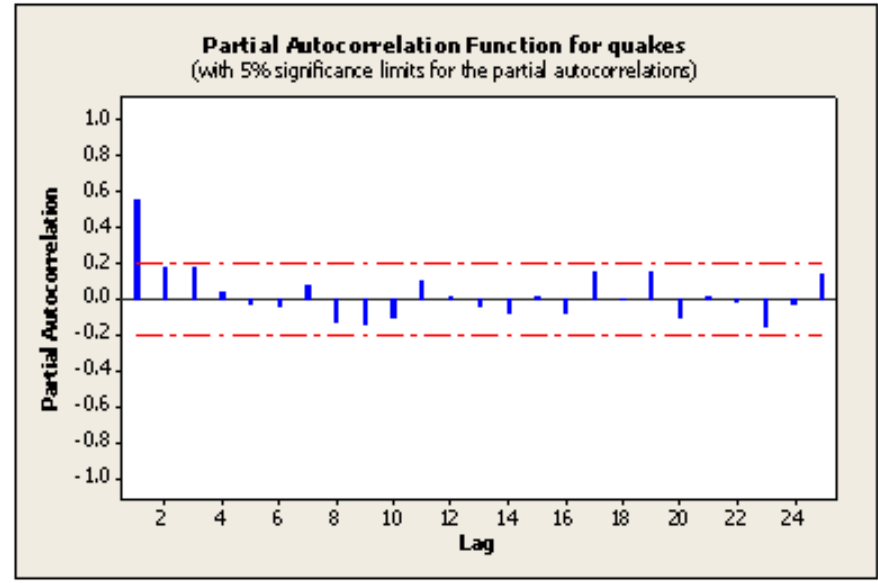

In [16]:
Image("img/pacf_1.png")

### Identification of an MA model is often best done with the ACF rather than the PACF.

for an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.

### MA(1)

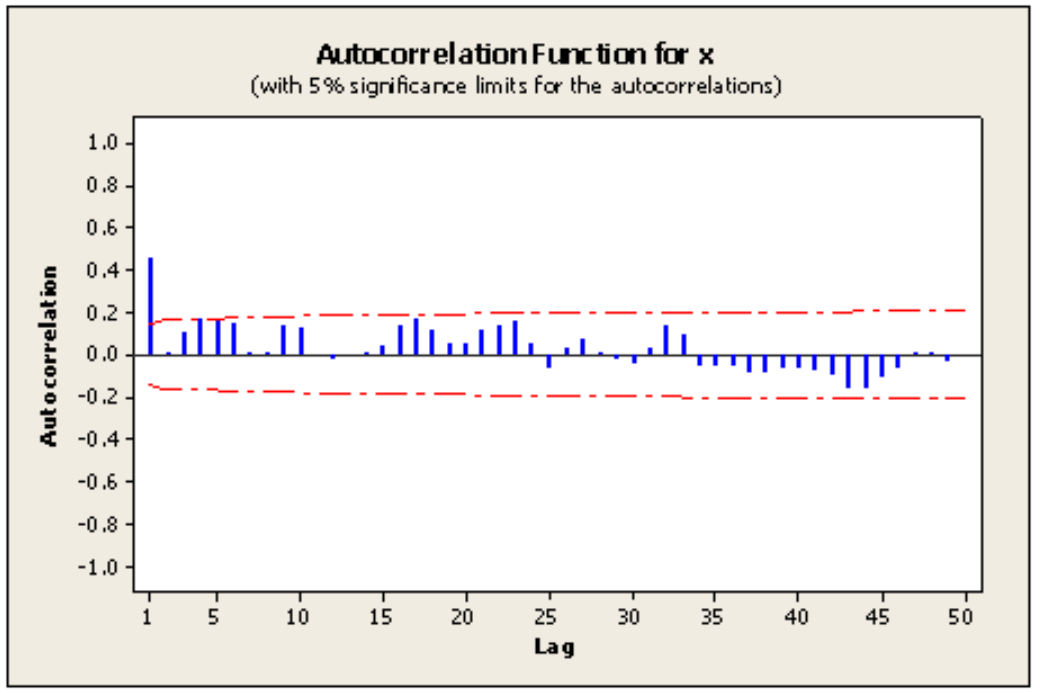

In [18]:
Image("img/acf_1.png")

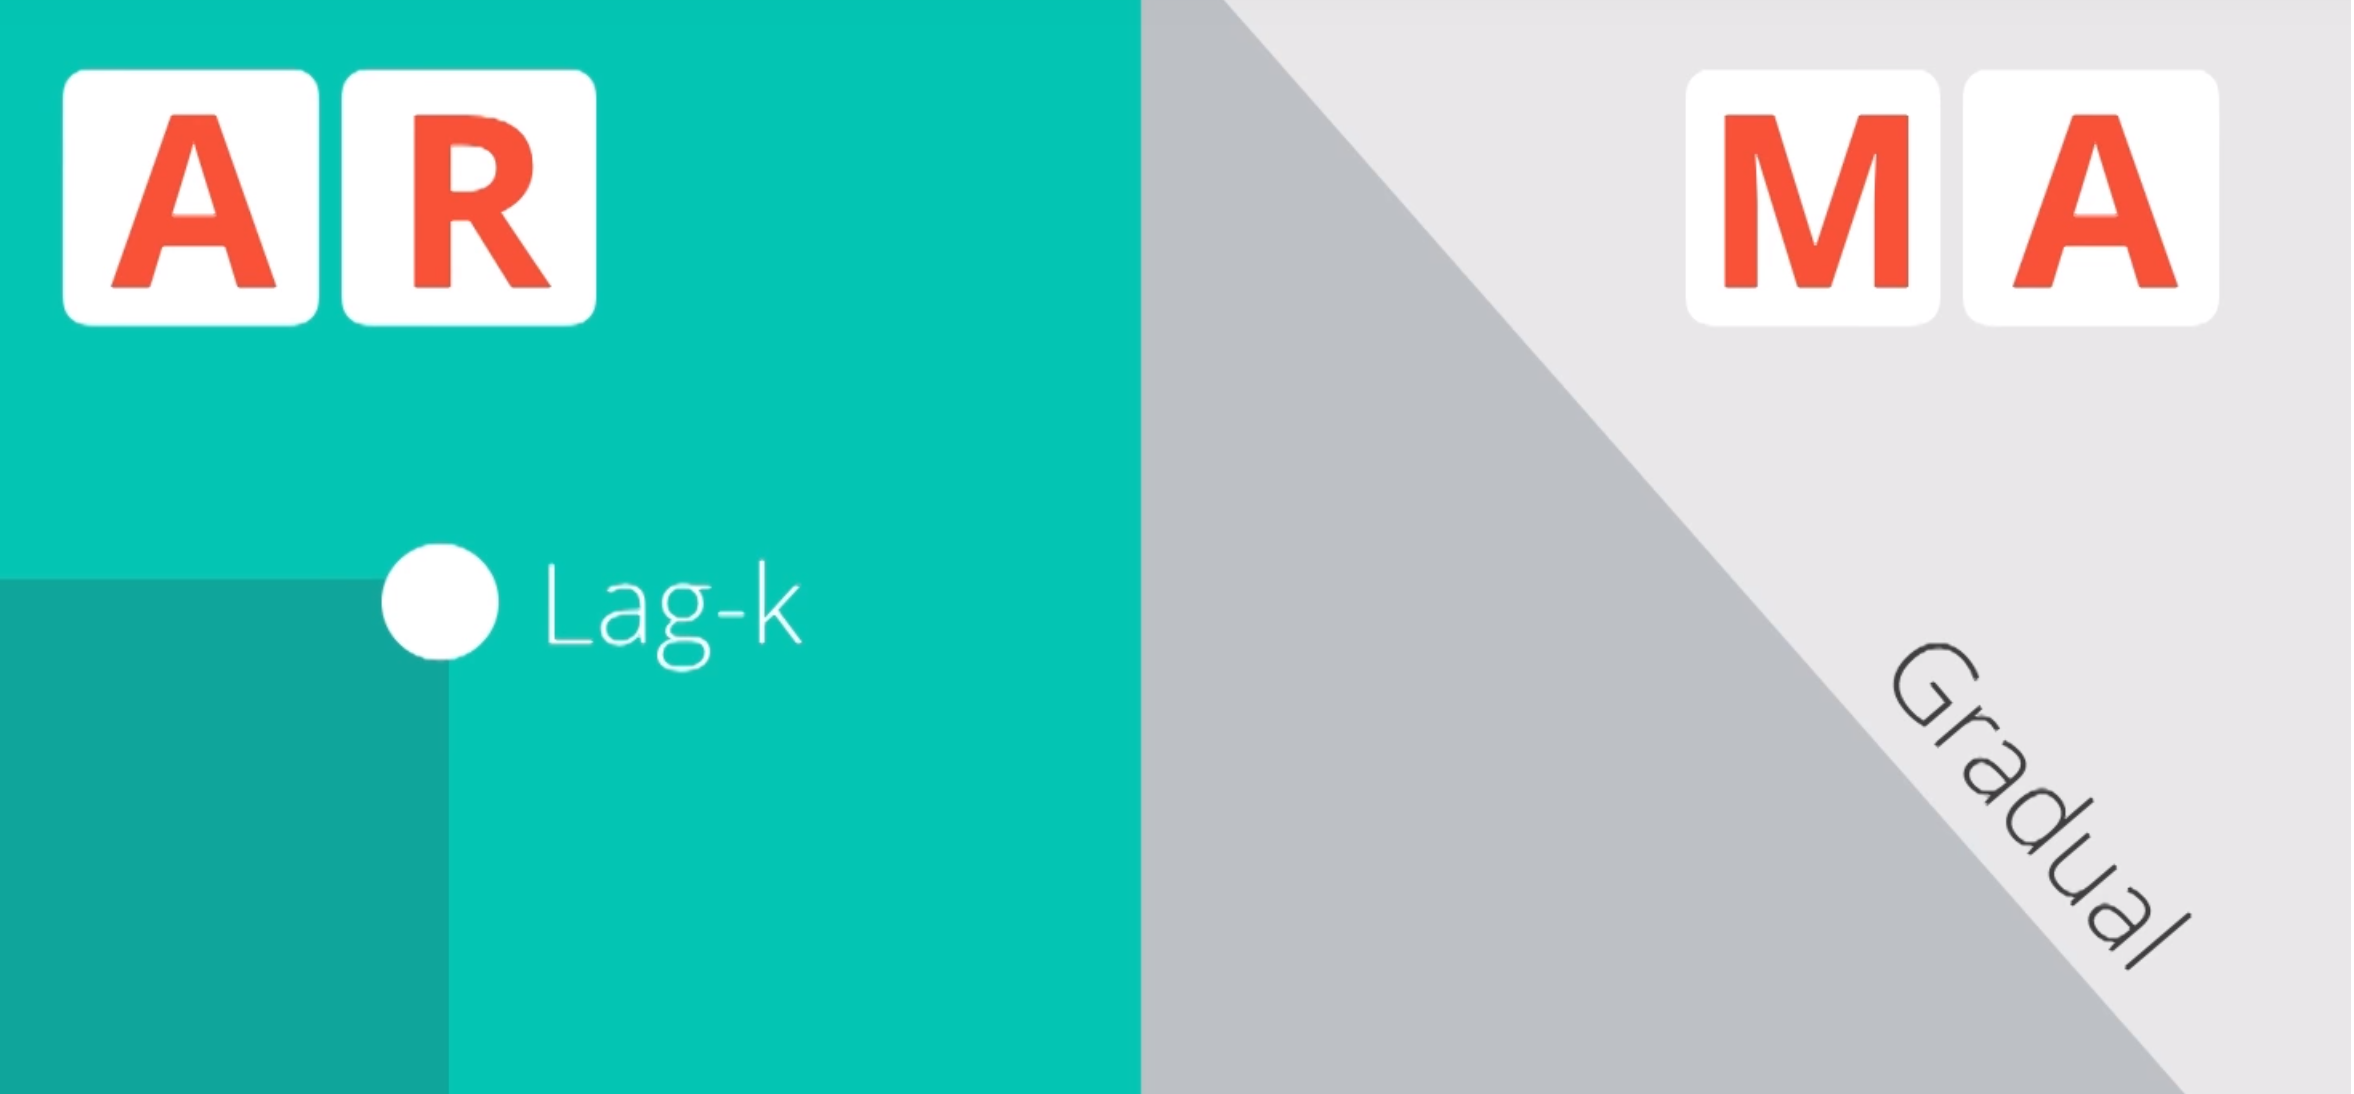

In [15]:
Image("img/ar_ma.png")

## Always review the ACF and PACF of "differenced series" when making judgements on how many AR and MA terms to include.

## AR Signs (act like linear regression for previous step noted by n) AR(n)
- PACF shows a sudden drop after specific lag
- ACF lag(1) is positive
- ACF is gradual drop

## MA Signs (applied regression on residuals/erros)
- ACF shows a sudden drop after specific lag
- PACF is gradual
- ACF lag(1) negative

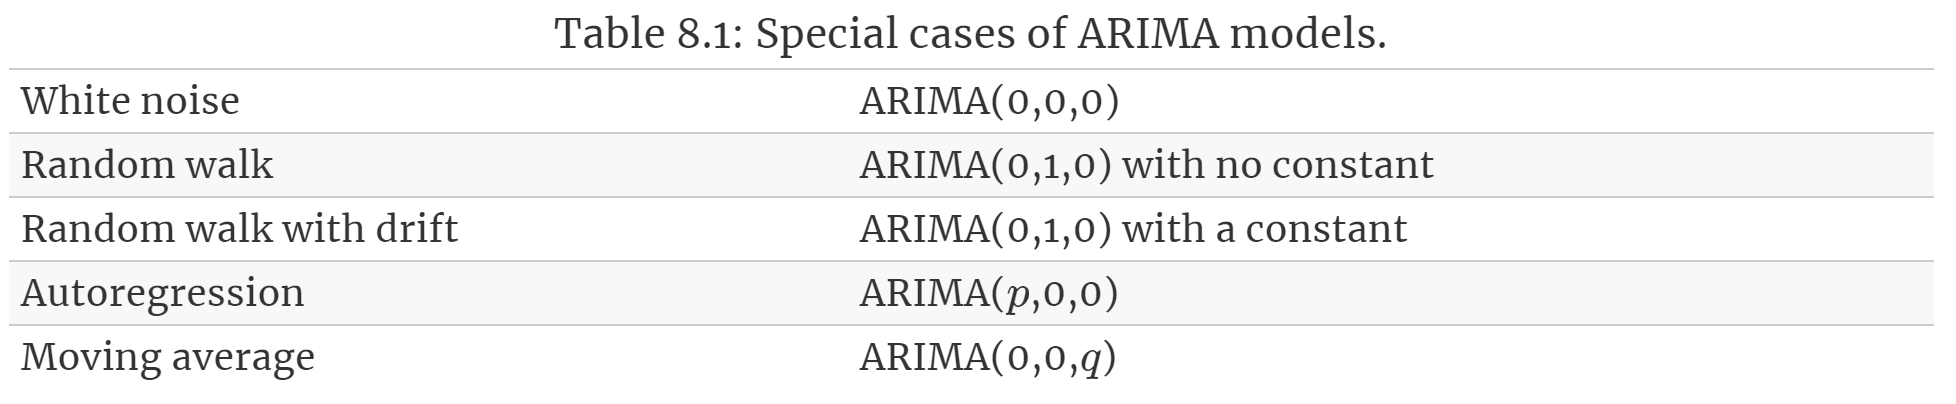

In [26]:
Image("img/random_walk_reg_ma.png")

### the first partial autocorrelation is identical to the first autocorrelation, because there is nothing between them to remove

ARIMA(3,0,0)
Only PACF drop suddenly after 3 lag, ACF shows slow gradual drop after lag 3

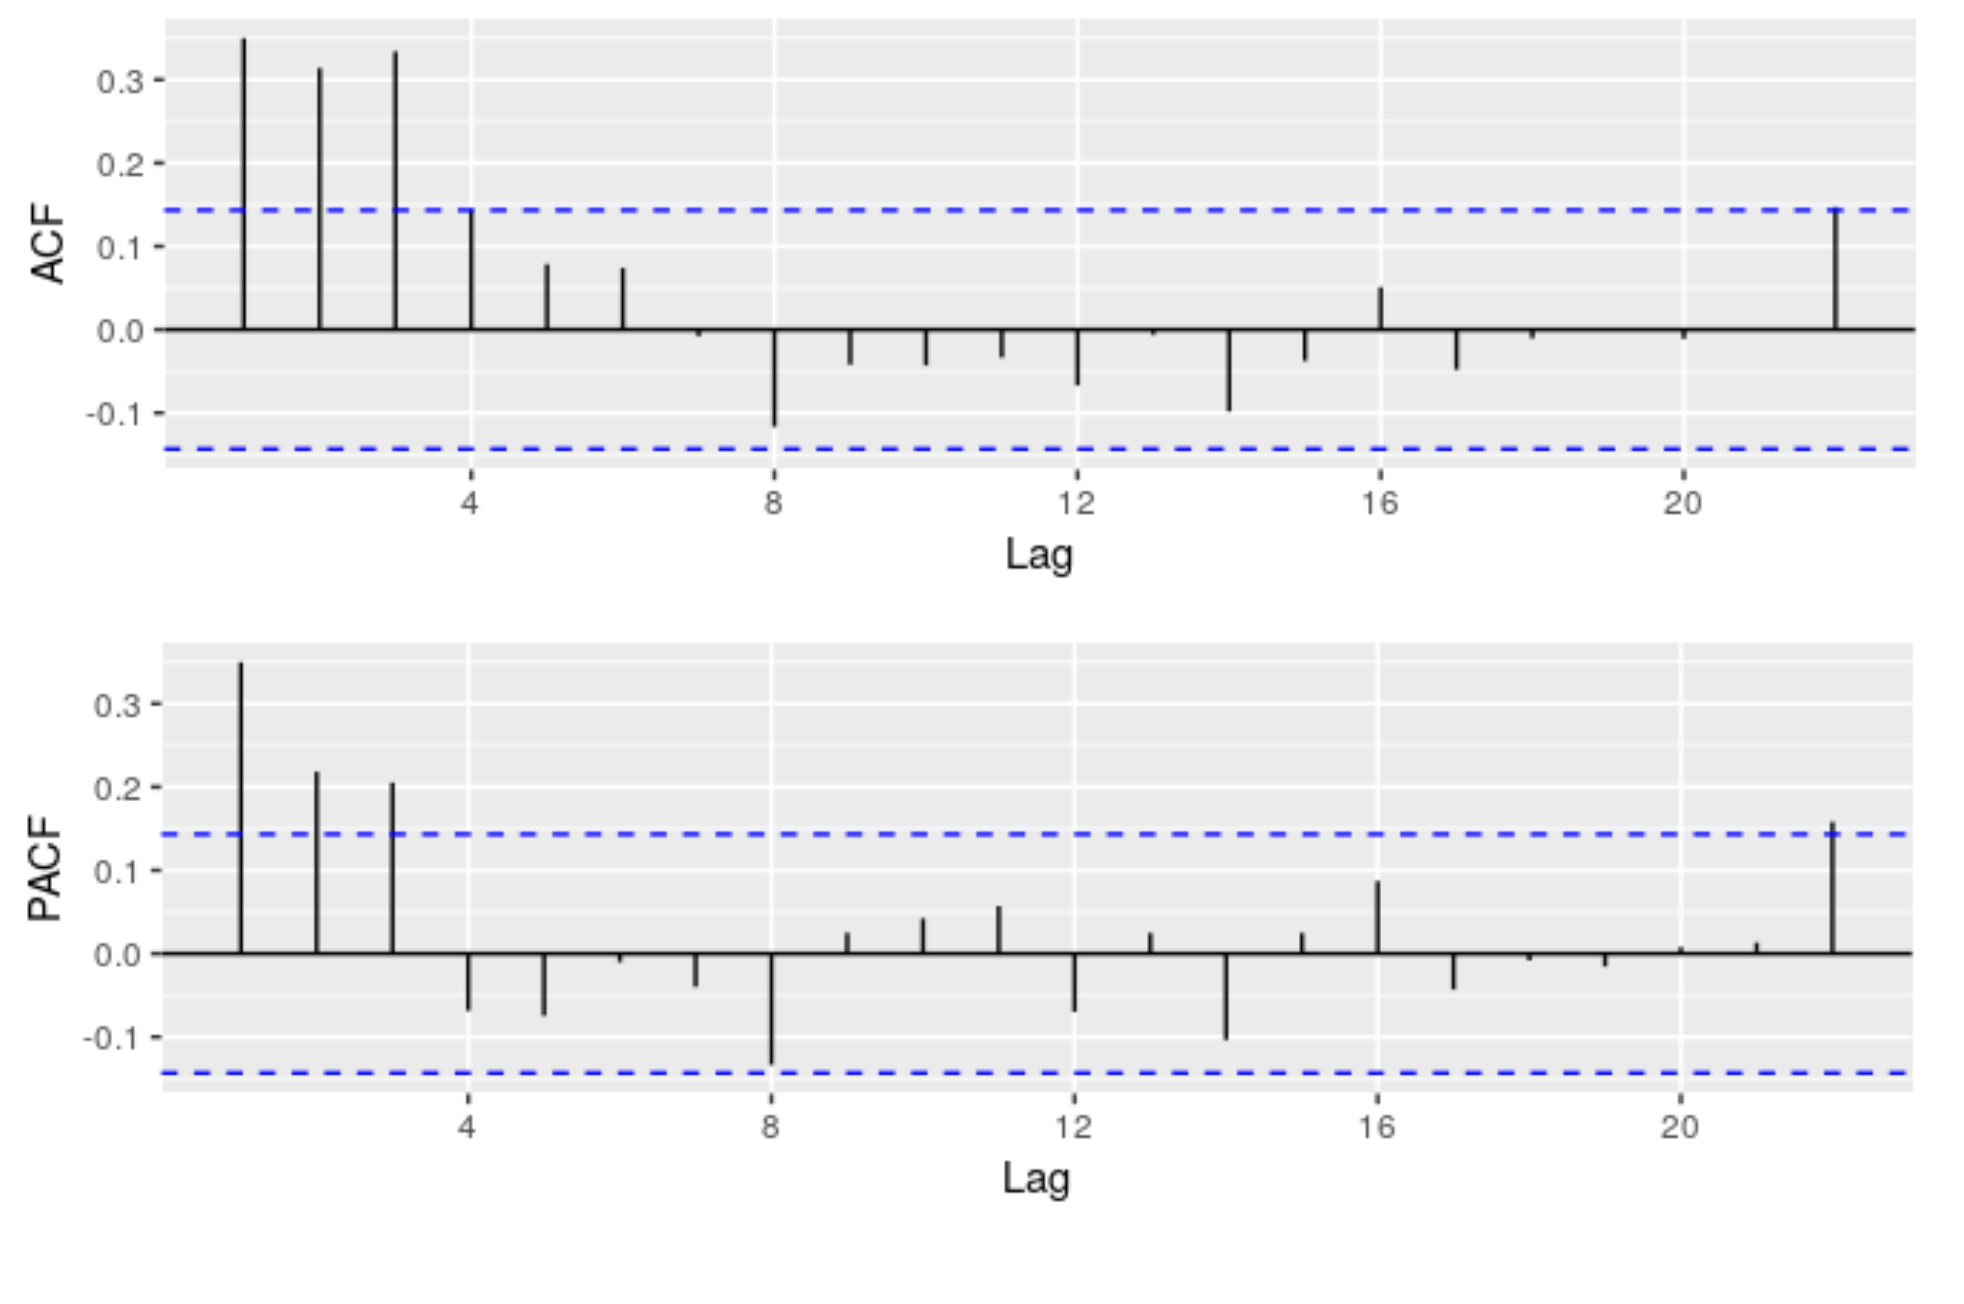

In [22]:
Image("img/acf_pacf_ar3.png")

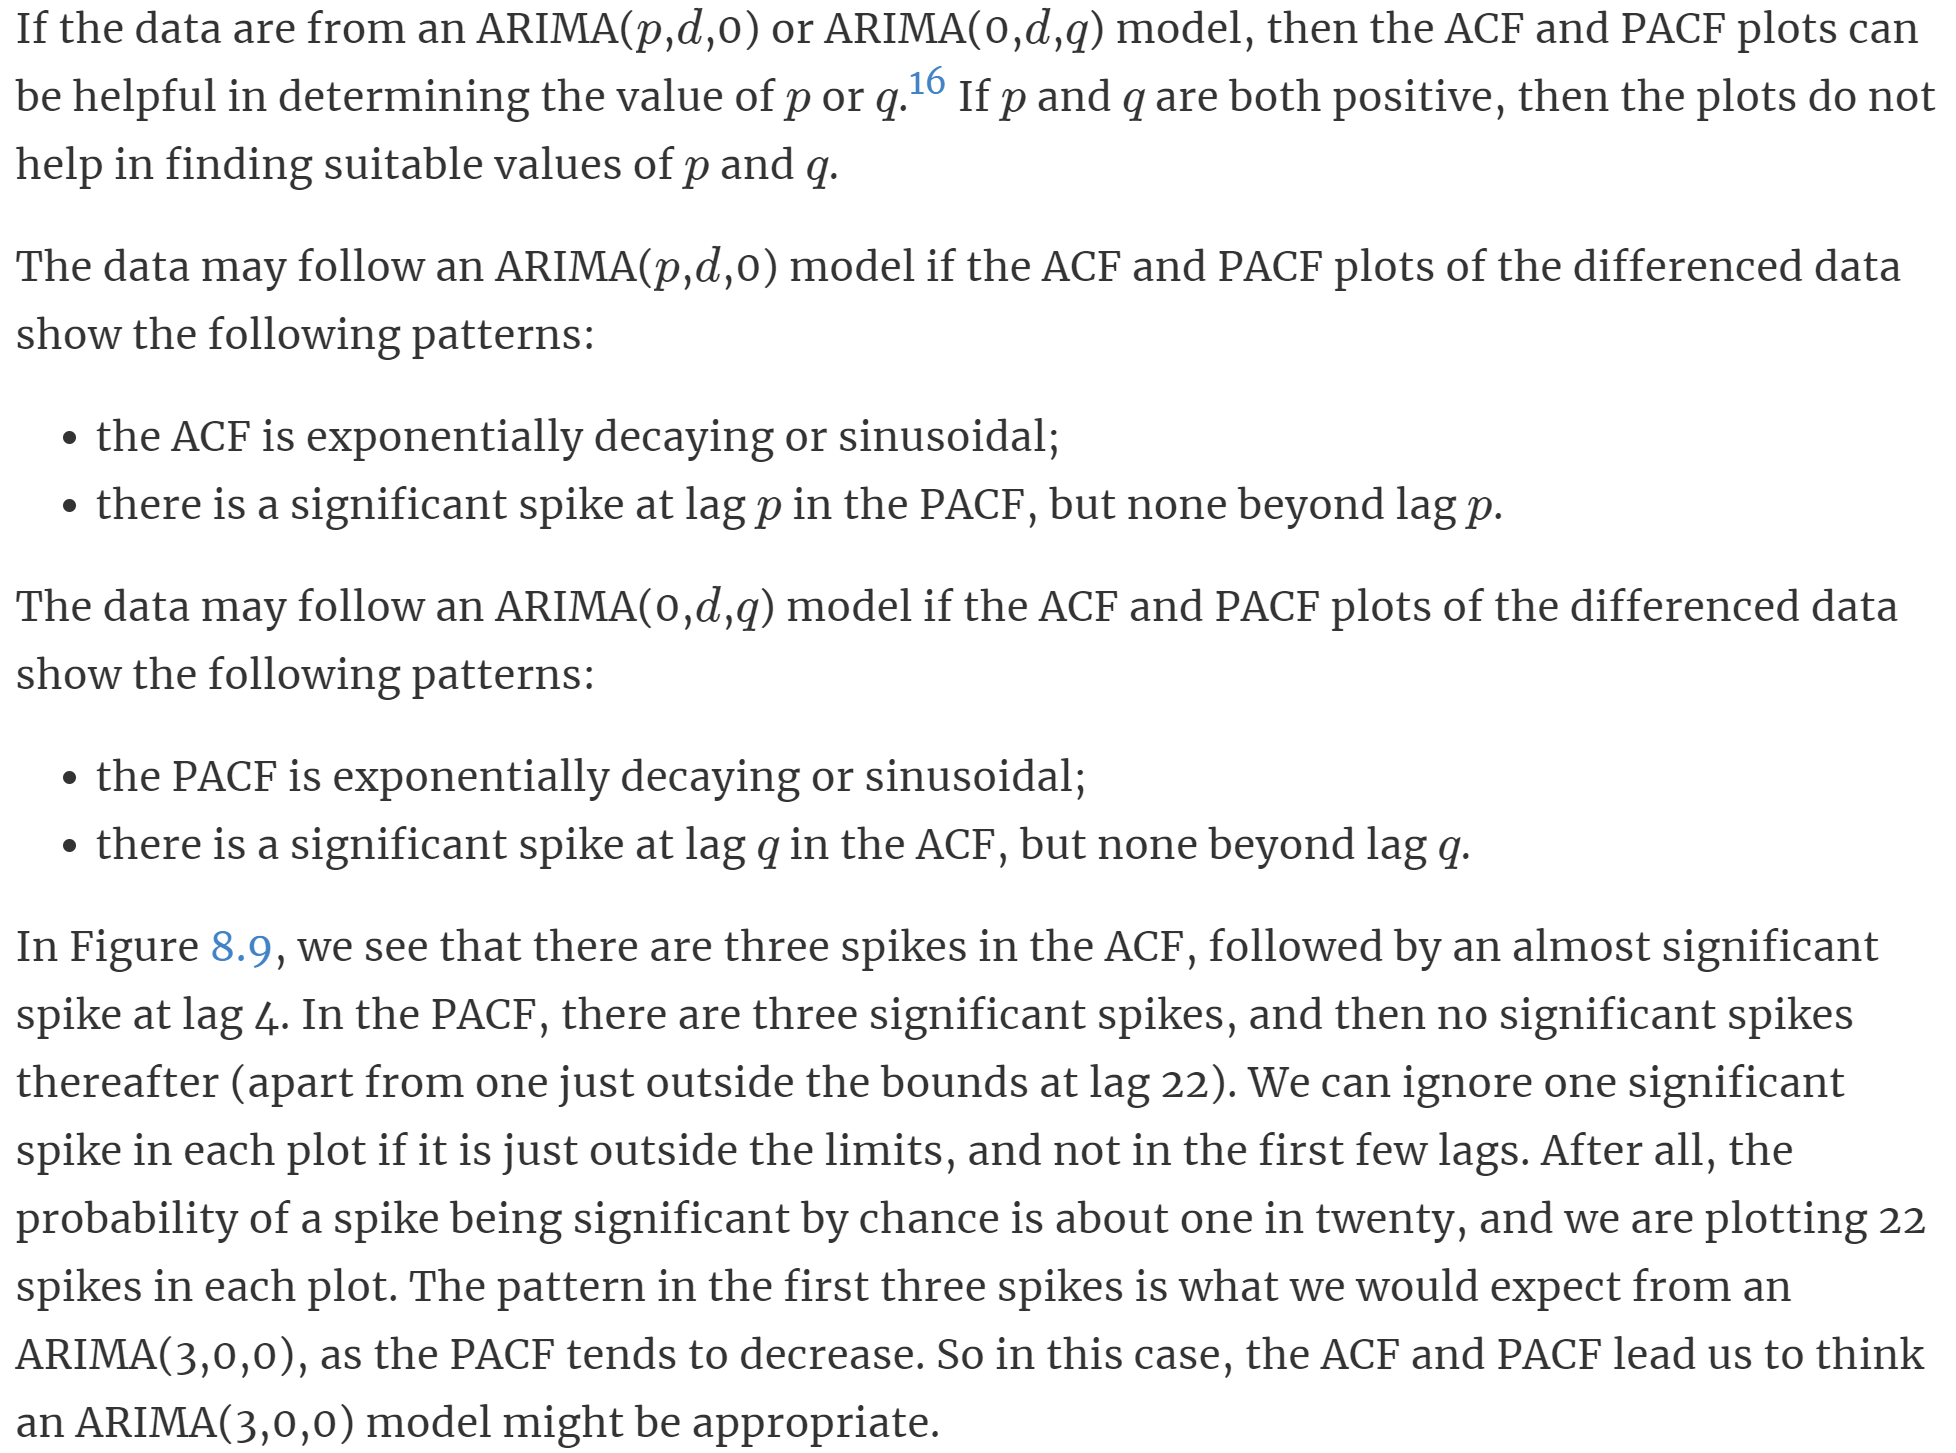

In [23]:
Image("img/p_d_q_explanation.png")

## Choosing appropriate p,q (not good for selecting d)
- ### AIC is similar to knowing the bias, variance trade off, bias from SSE, and variance from number of paramters
- ### Try to minimize the AIC, BIC, AIC_(corrected)

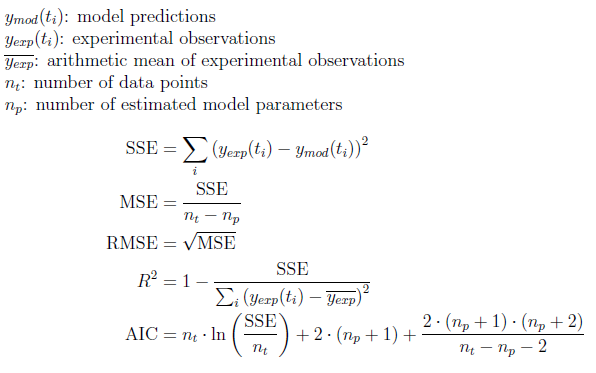

In [25]:
Image("img/aic_bic.png")

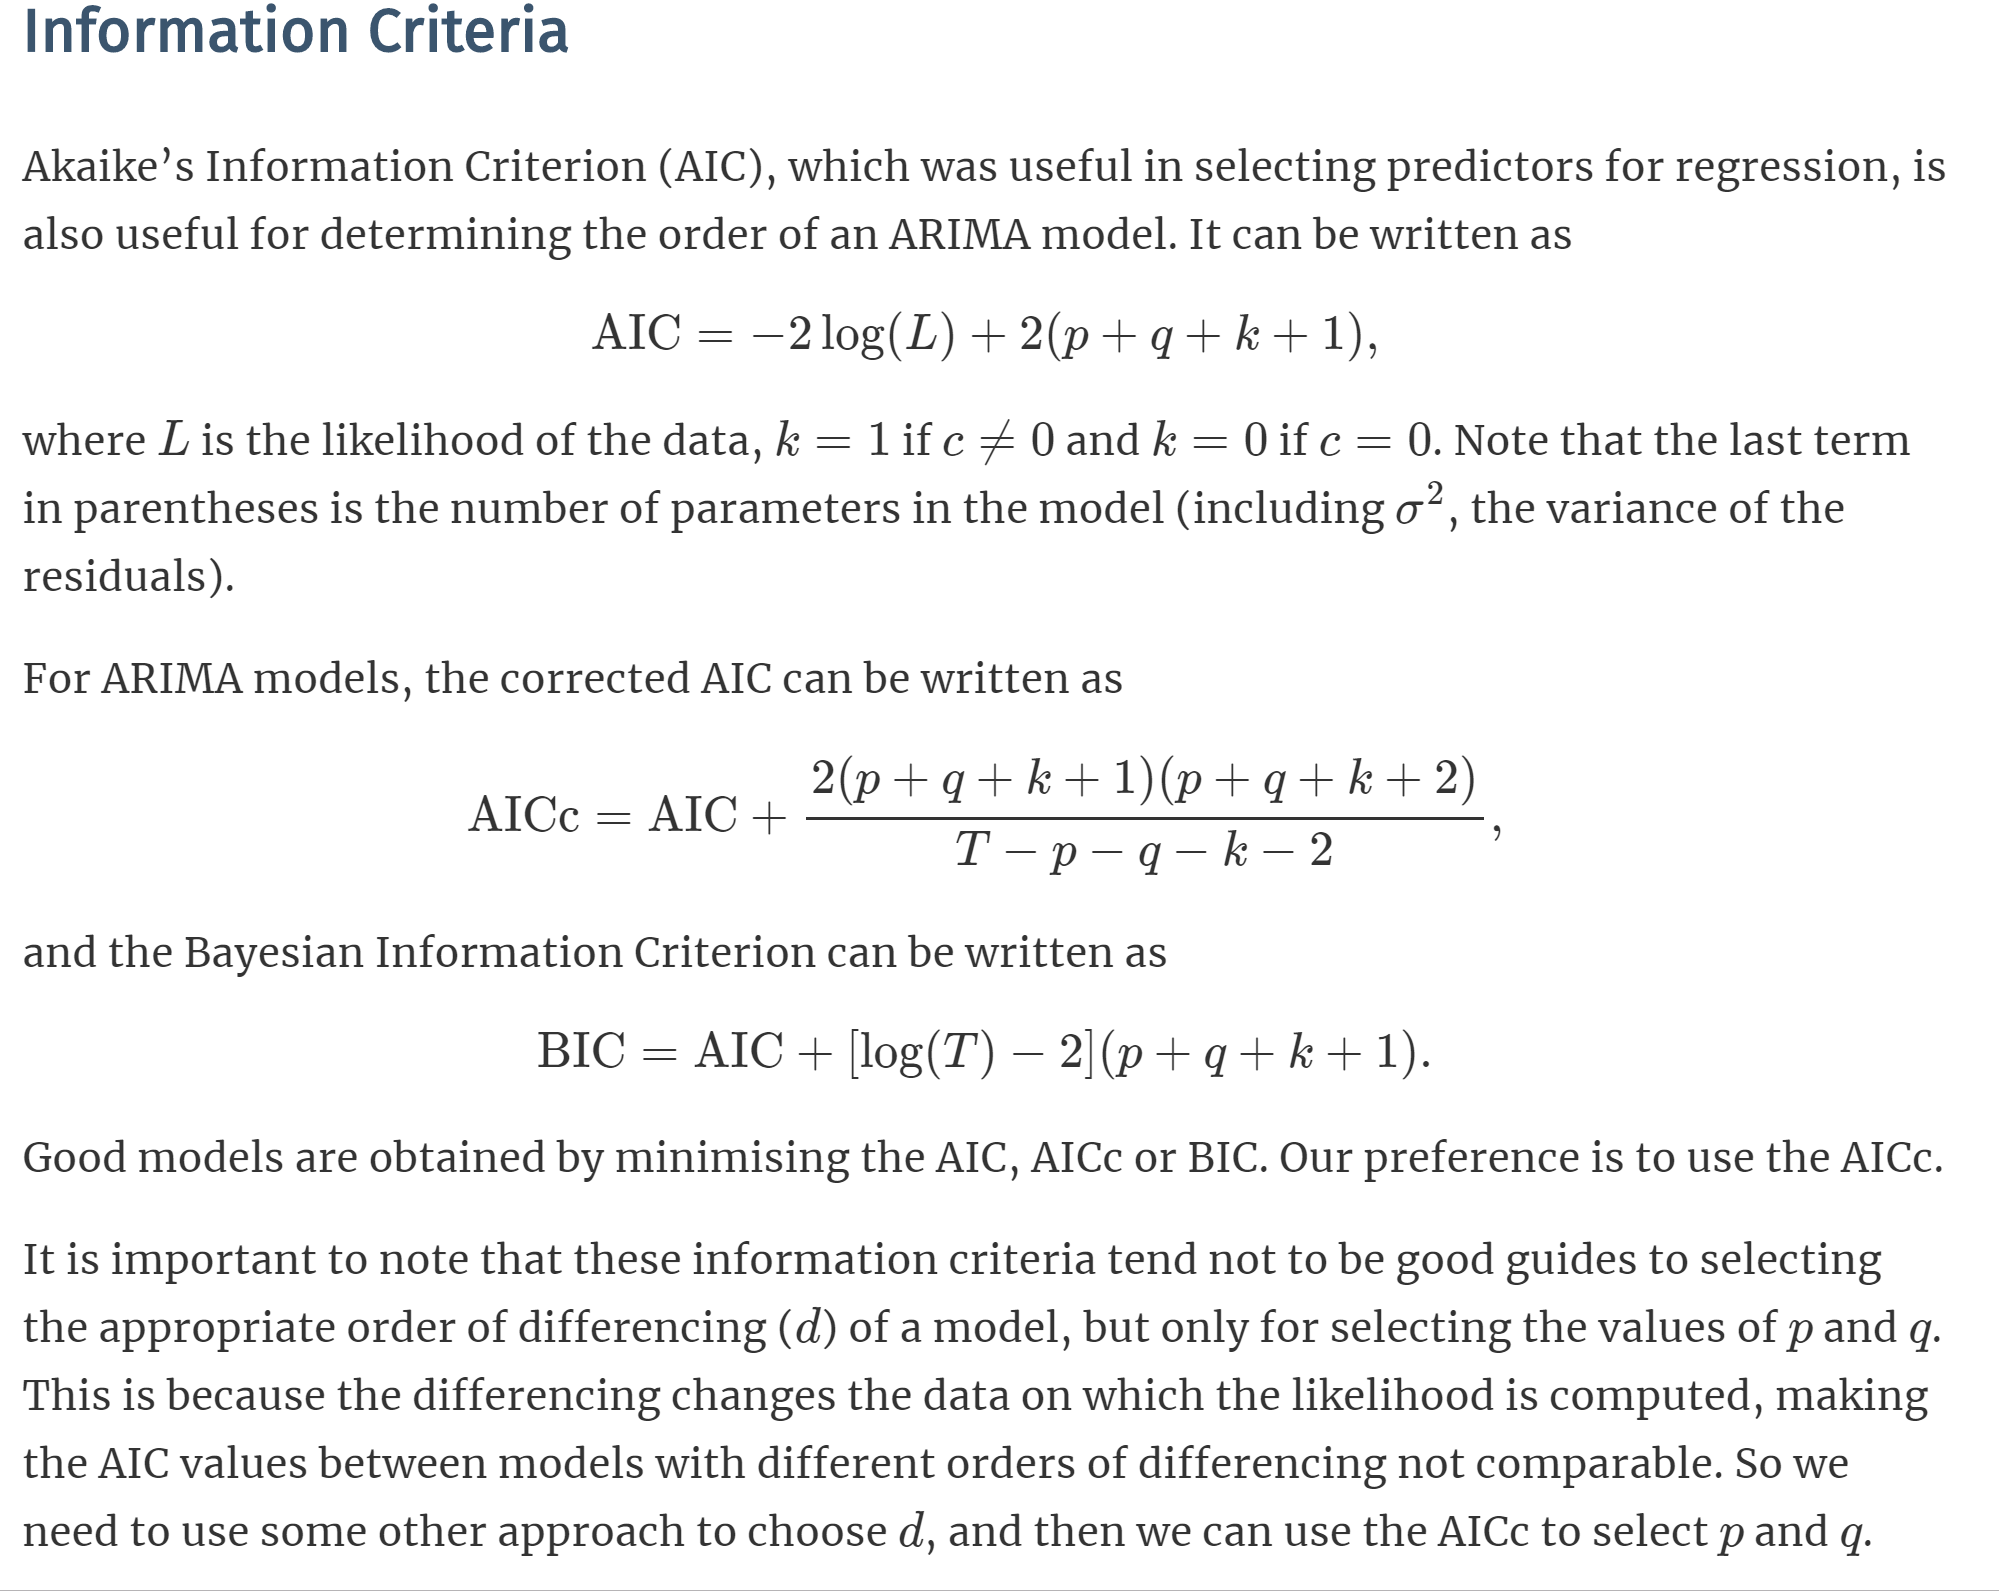

In [24]:
Image("img/aic_bic2.png")

## Manual p,d,q selection

- Play with your date from ACF and PACF and use p_ini + 1 , p_ini - 1, also q_ini + 1 , q_ini - 1 as extra variation to select the best fit using AIC in step 4-5 below

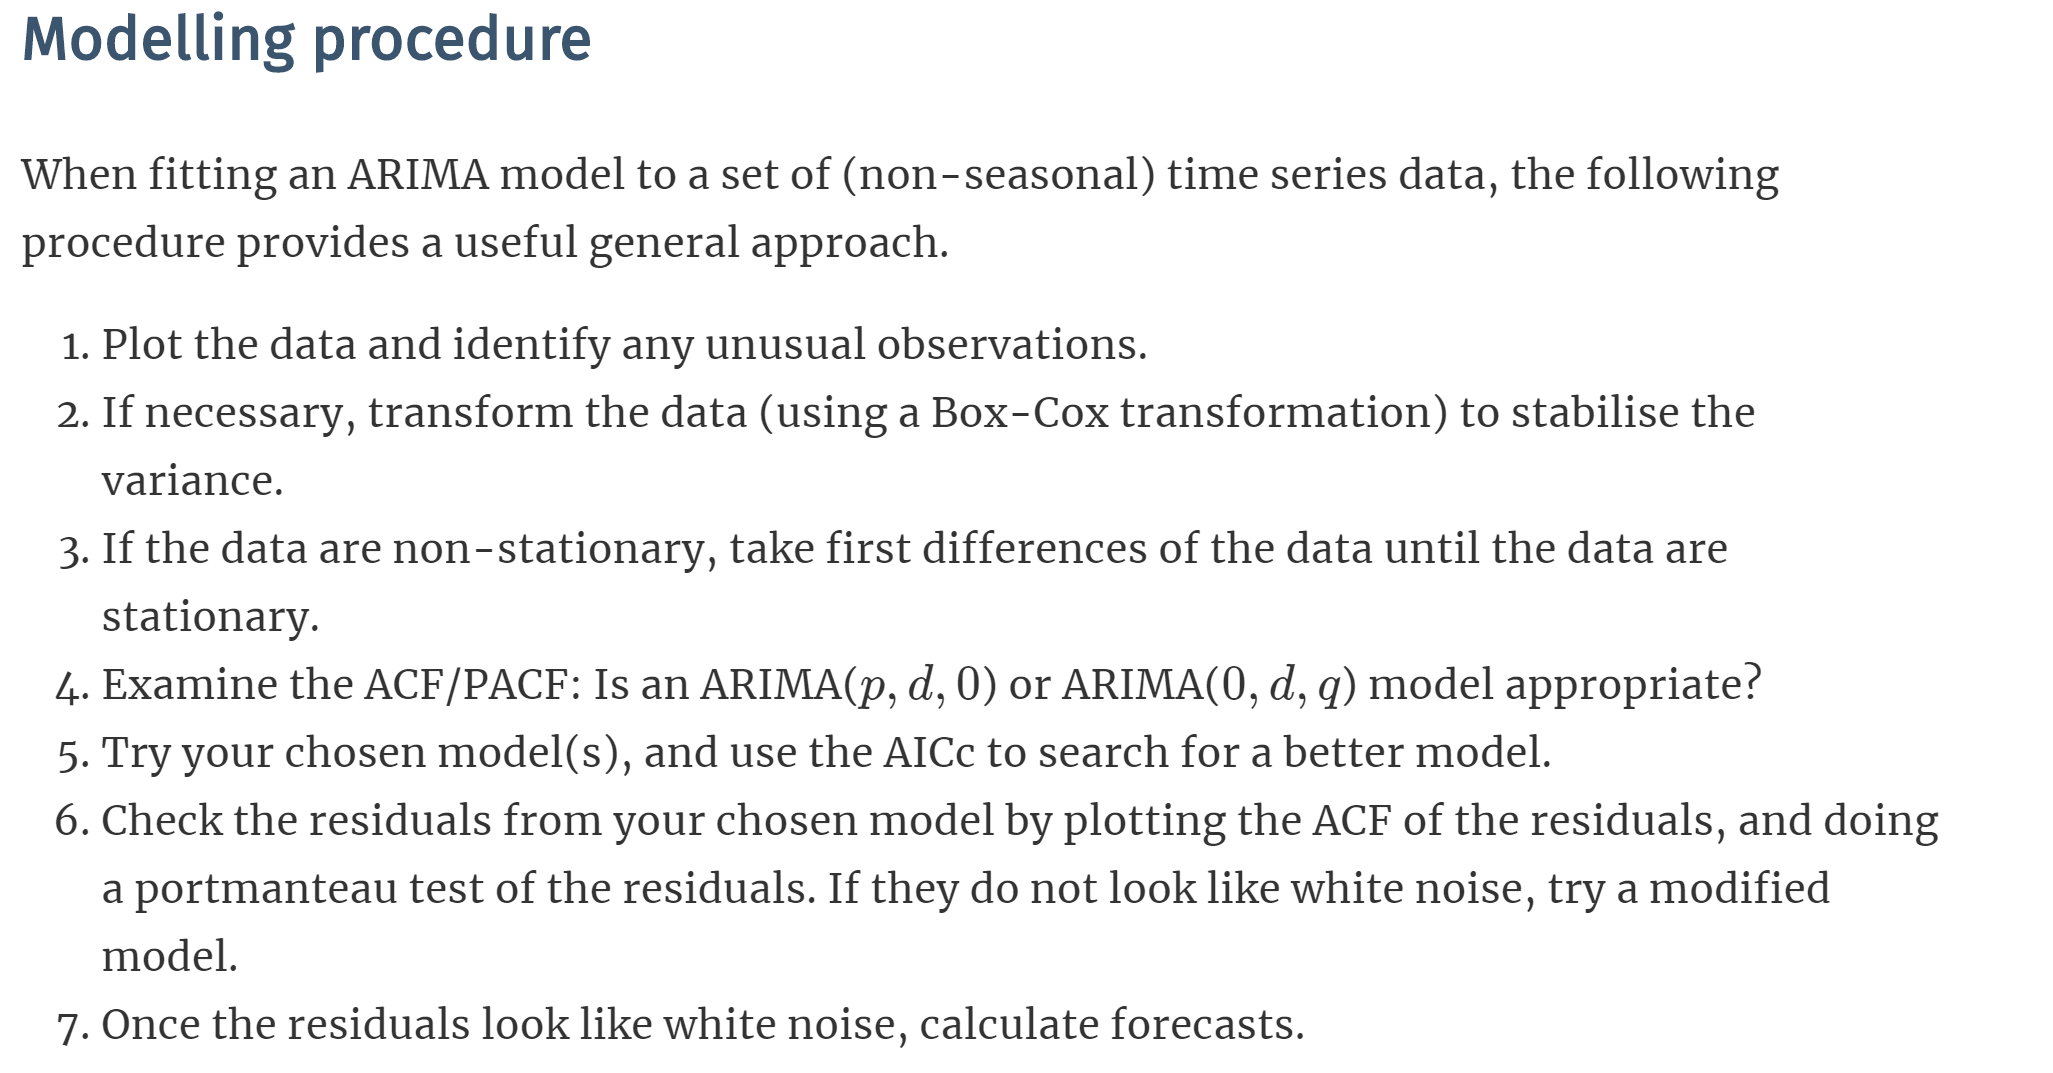

In [27]:
Image("img/manual_procedure_arima.png")

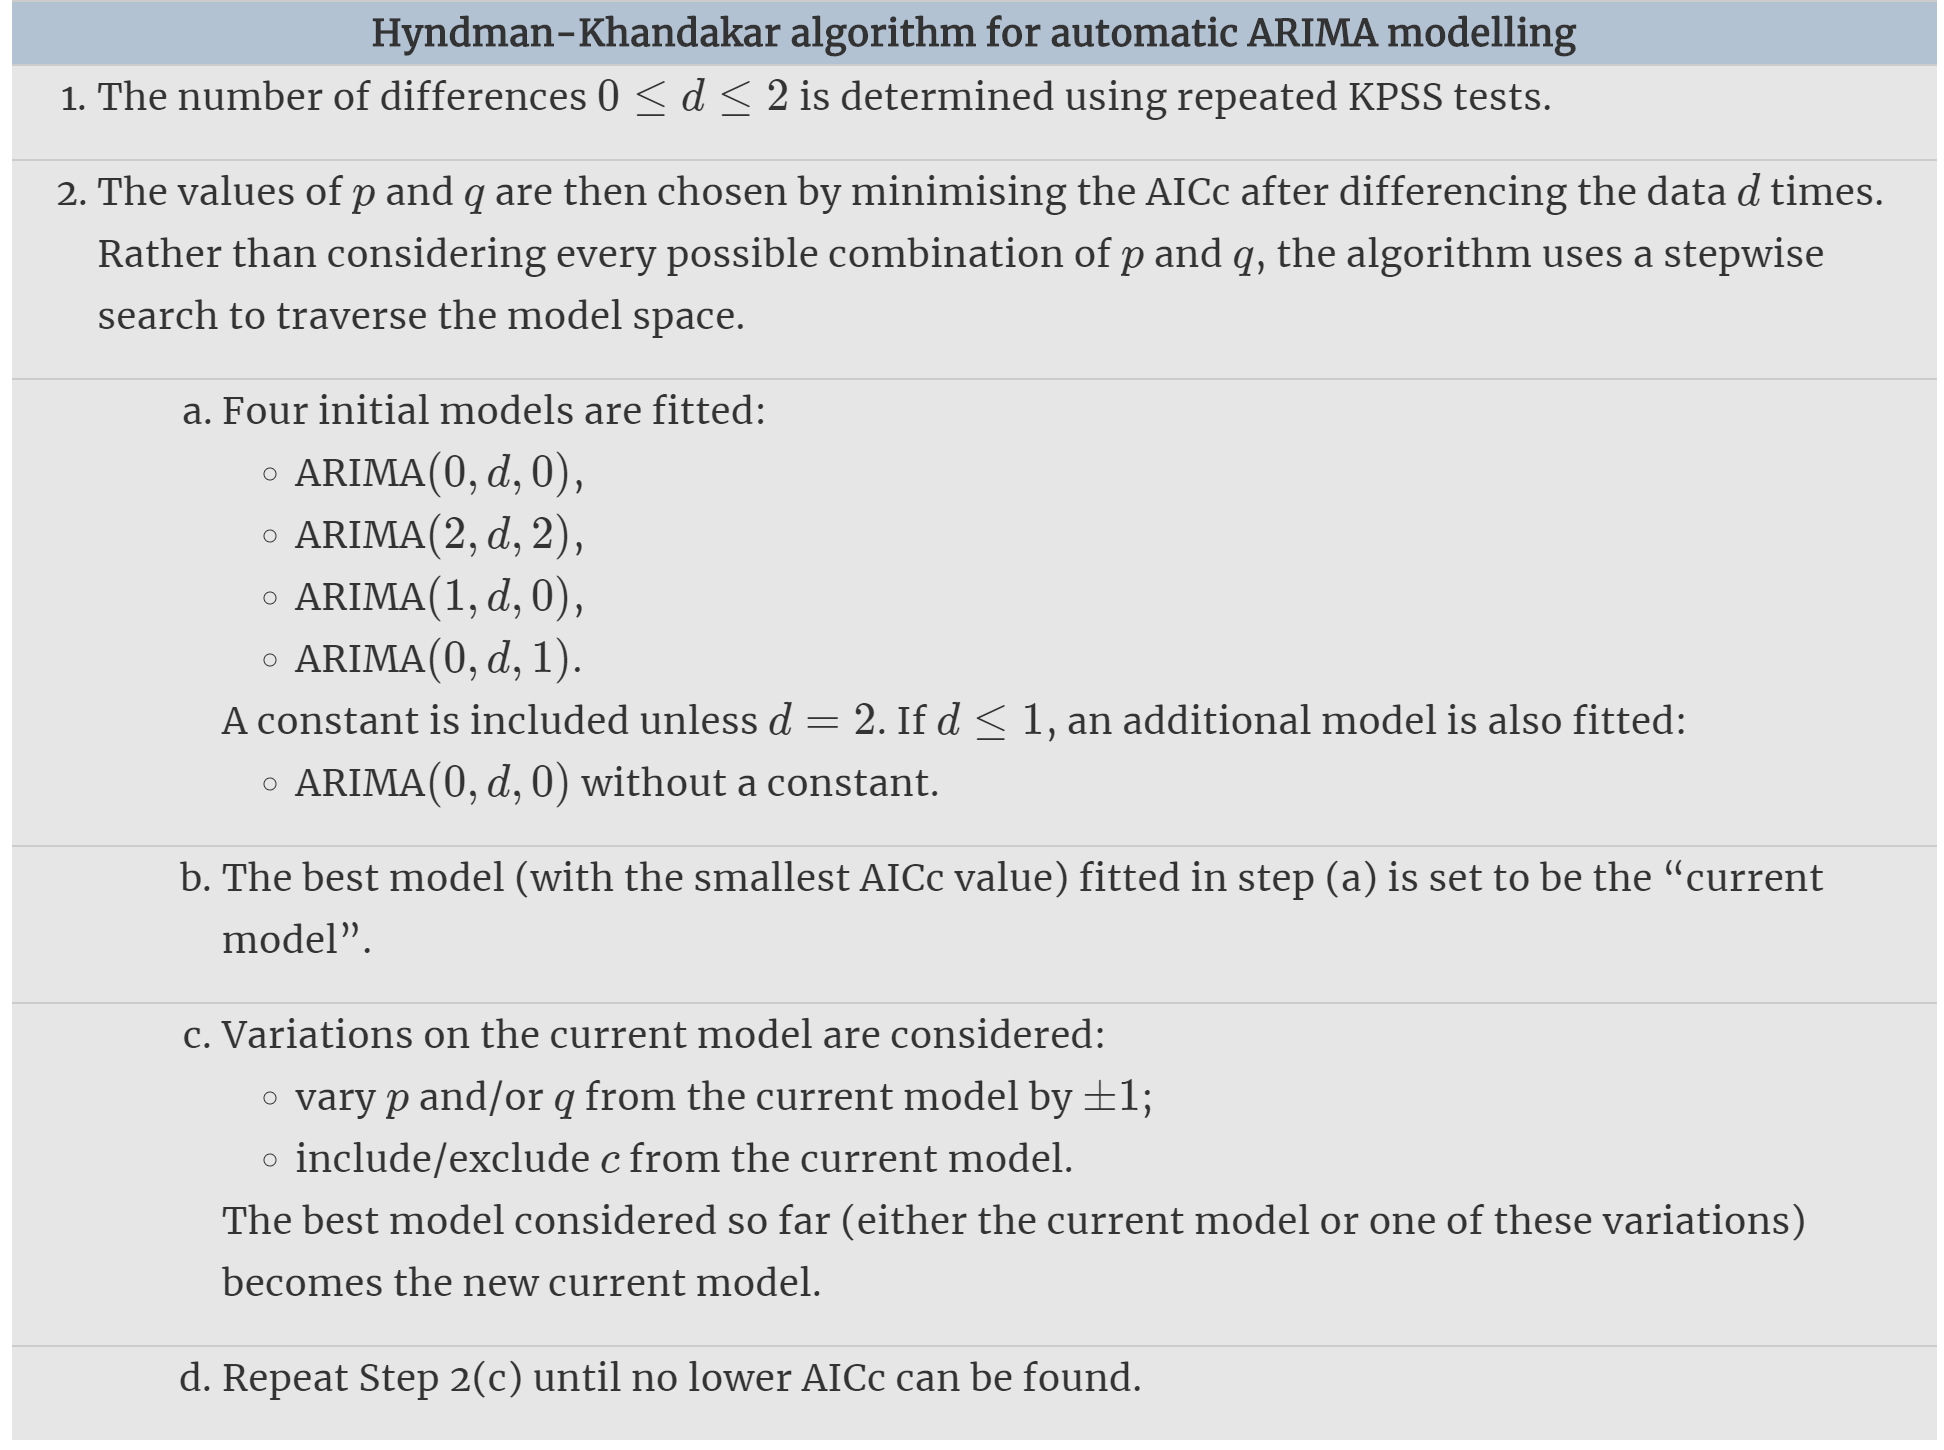

In [28]:
Image("img/automated_procedure_arima.png")

## Effect of constant value in Automated ARIMA

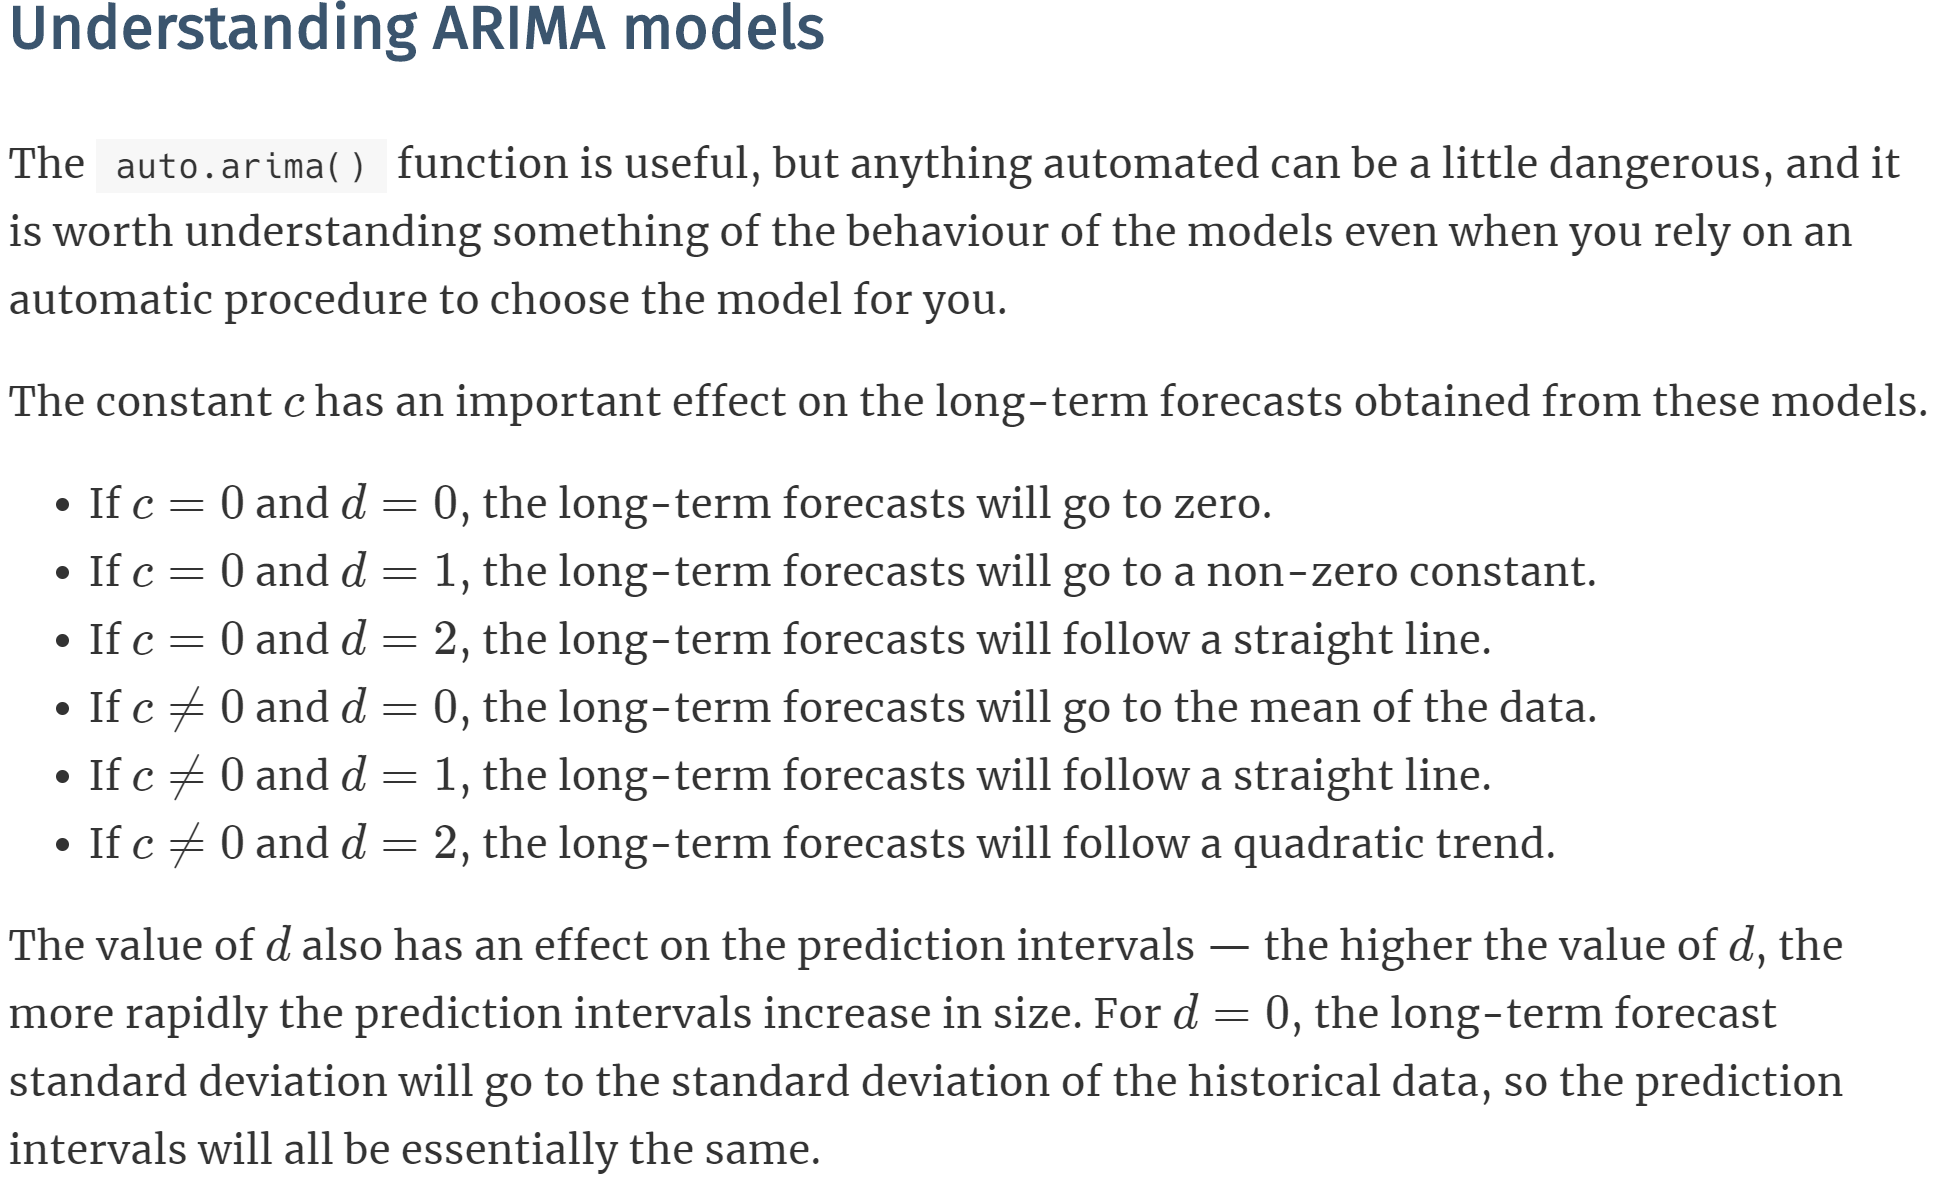

In [29]:
Image("img/constant_term.png")

# Non-Seasonal ARIMA

ARIMA (p,d,q) (P,D,Q) m

- p,d,q shows lags of AR, number of differencing, and lag of moving average, estimaetd from ACF and PACF
- P, D, Q shows lags of AR, number of differencing, and lag of moving average, estimaetd from ACF and PACF but on seasonal part, for example differencing should be done if m=12 (12 month season) to check December of one year to the value on December for the year before
- PACF and ACF still help for seasonal part but need to check e.g. for m=12, at lag 12, 24, 36 ,.... (not lag 1-12)

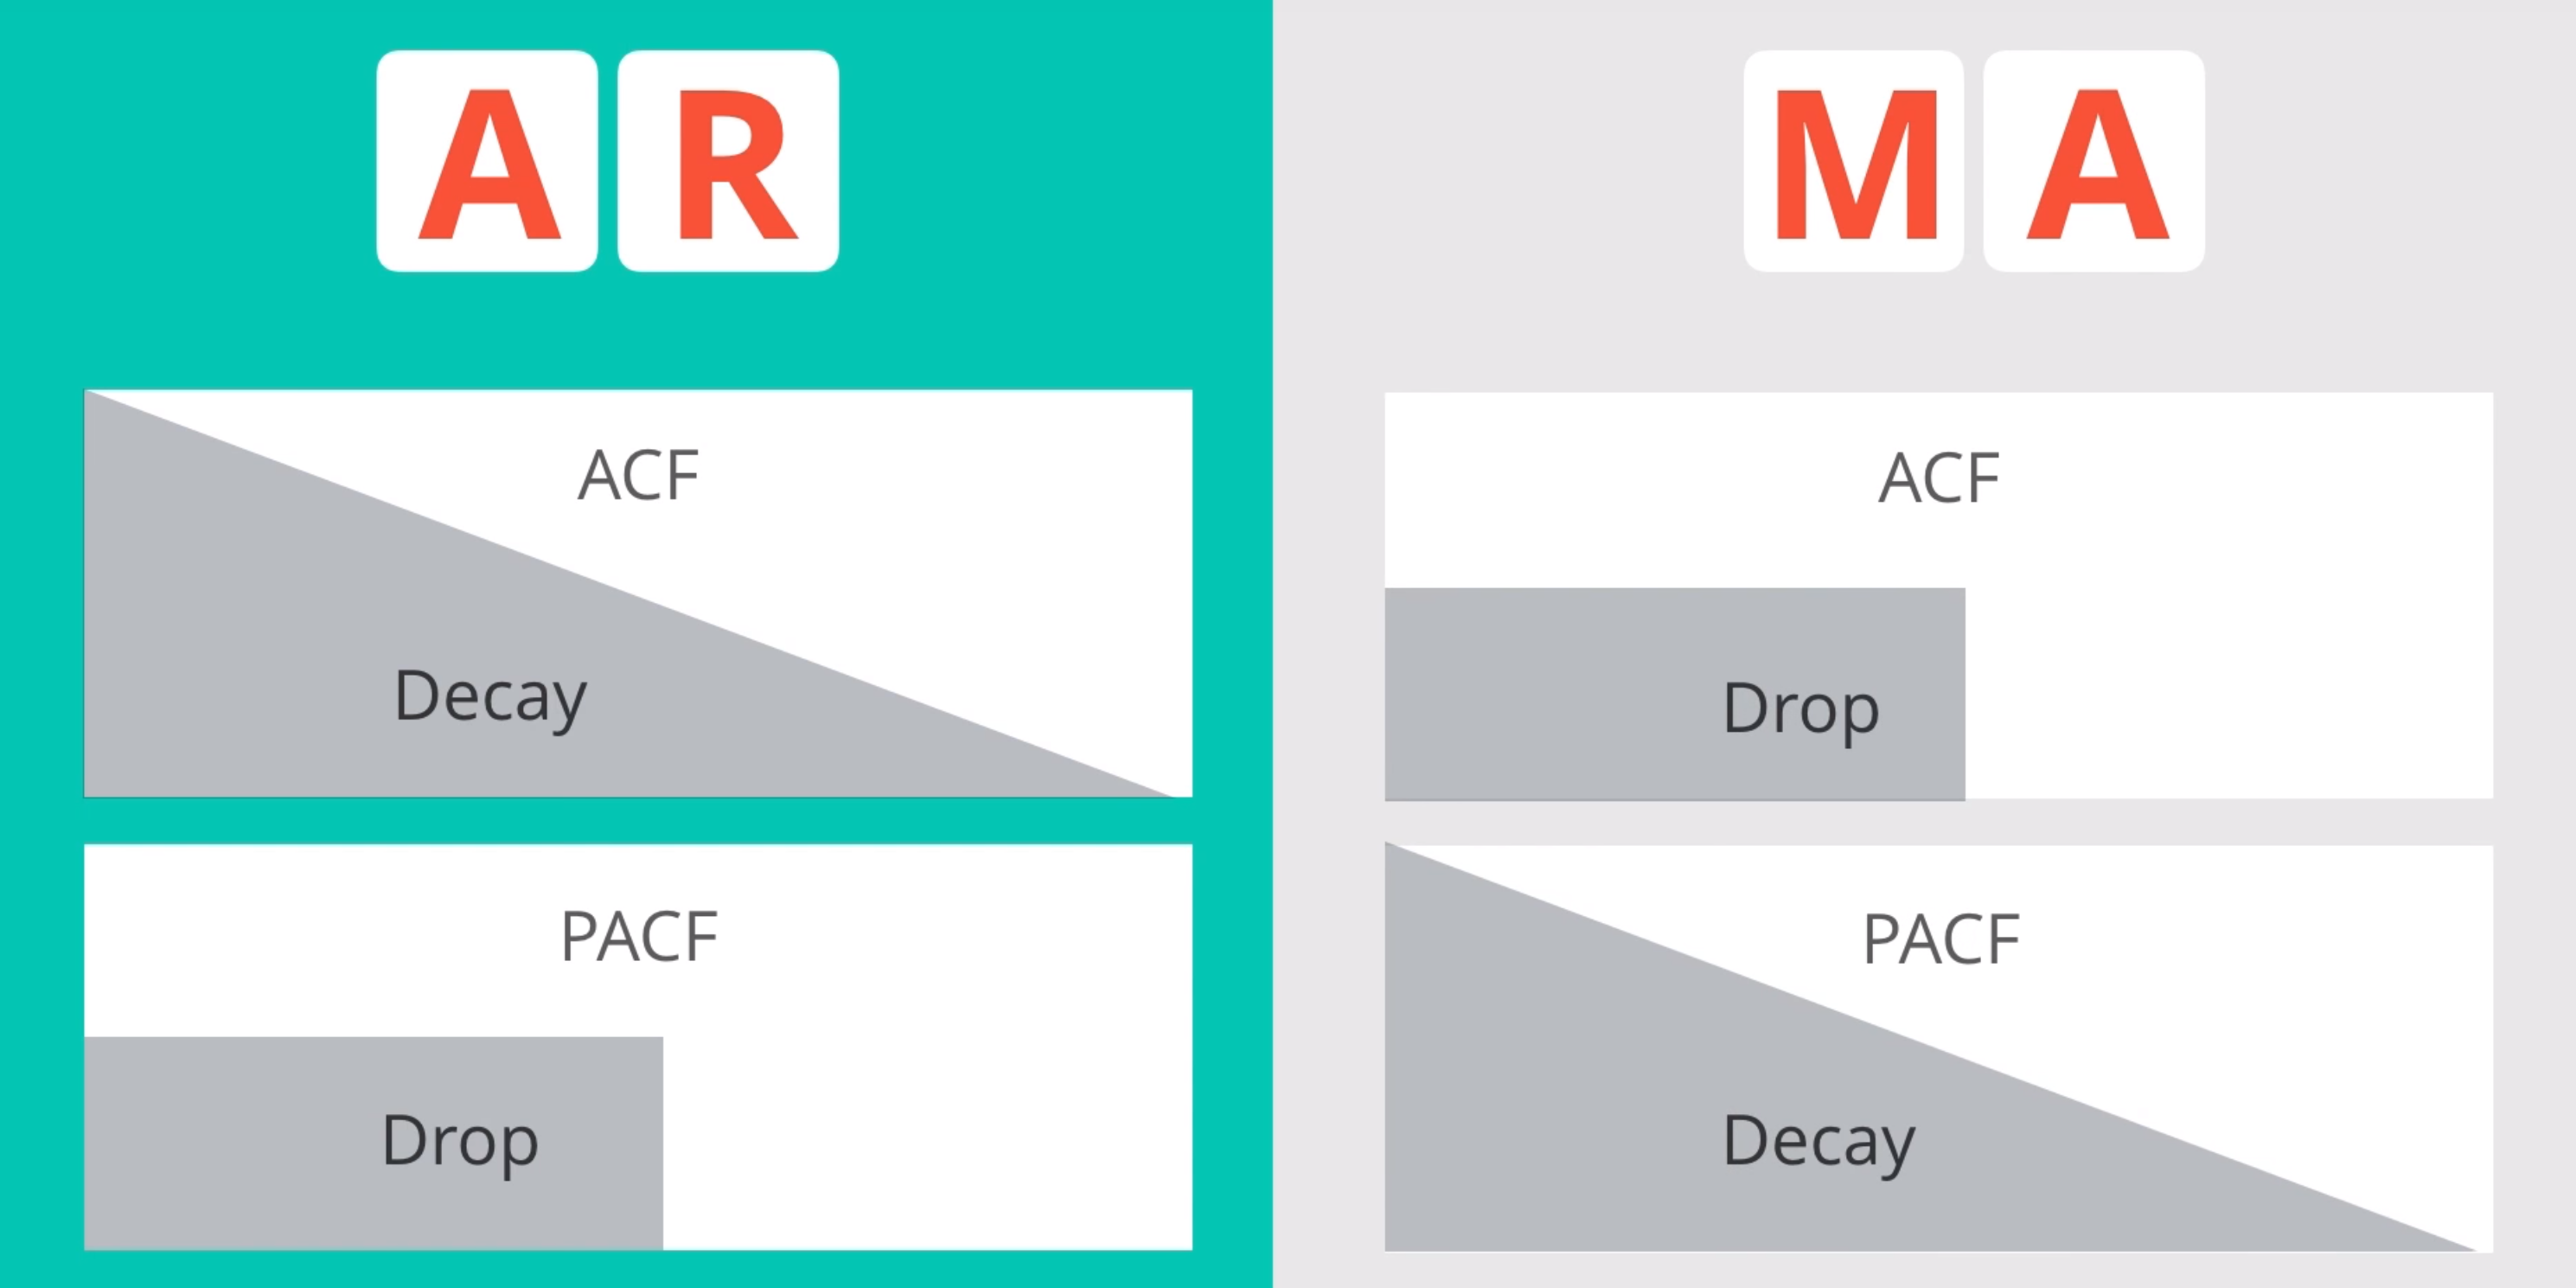

In [31]:
Image("img/general_rule_p_q_select_season_non-season.png")